# Data Science Mini Project
- Joey Lim Soo Yee (U1921745L)
- Josephine Agatha Hemingway (U1920309C)
- Kenn Lim Zheng Jie (U1921807J)

# Table of Contents
1. [Exploratory Analysis and Preprocessing of the Data](#1.-Exploratory-Analysis-and-Preprocessing-of-the-Data)
2. [Features Engineering](#2.-Features-Engineering)
3. [Clustering](#3.-Clustering)
4. [Incorporating all features](#4.-Incorporating-all-features)
5. [Predictive Models](#5.-Predictive-Models)
6. [Overview of Predictions](#6.-Overview-of-Predictions)
7. [Conclusion & Further Application](#7.-Conclusion)
8. [References](#8.-References)

# Project Description

### Problem Statement: To find out whether a particular video will surpass 100,000 views
Dataset obtained from Kaggle: YouTube Trending Video Statistics with Subscriber

https://www.kaggle.com/sgonkaggle/youtube-trend-with-subscriber

In this project, we analyse a data set of the top trending YouTube videos in the US. We extract characteristic features of popular videos such as the total number of likes and dislikes, number of subscribers, video tags and text from the title and use them to predict whether a particular video will surpass 100,000 Views.  We will also cluster the dataset via various clustering algorithms by analysing tags and titles. These clusters are then used as a feature for prediction.

This prediction model can then be applied to businesses for multiple purposes such as marketing whereby they would be able to incorporate the necessary elements to produce a video with high viewership.

# 1. Exploratory Analysis and Preprocessing of the Data
Here, we do basic exploration of the data and basic data cleaning.

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Features Engineering](#2.-Features-Engineering))

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
vidData = pd.read_csv('USvideos_modified31mar2020.csv')
vidData = vidData.dropna() # drop any rows with any NaN values
vidData.drop_duplicates(inplace= True) # checking for duplicates and removing them
vidData = vidData.reset_index()
vidData

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ‚ñ∂ \n\nSUBSCRIBE ‚ñ∫ ...,7,8,68,426,23,4191209.0
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,4542,CvkOWb1U-LI,4543,5/3/18,2/3/18,19,28,Science & Tech,Techquickie,230223,...,True,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,Why do progress bars you see when installing a...,1,3,25,102,23,1980988.0
4275,4543,_CFJ1u-DIBc,4544,5/3/18,2/3/18,19,28,Science & Tech,Tech Insider,128591,...,True,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,"Bluetooth has been around for over 20 years, b...",1,3,140,407,17,1420833.0
4276,4544,Juad74hE6rs,4545,5/3/18,1/3/18,16,26,How to,Gemma Stafford,55076,...,True,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,One Frosting. Any Flavor!\nCRAZY FROSTING RECI...,1,4,75,147,24,1549469.0
4277,4545,n_S8d_1KVhU,4546,5/3/18,1/3/18,18,20,Gaming,Scott Manley,48505,...,True,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,The Advanced Baseline Imager is the state of t...,1,4,13,20,8,692776.0


In [3]:
vidData.describe()

,index,rowid,publish_hour,category_id,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03,4.279000e+03,4.279000e+03,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03
mean,2272.060294,2273.060294,13.590091,20.421828,1.283840e+06,4.038186e+04,2.315079e+03,4816.719327,3.119654,4.845992,31.762328,137.541482,463.509932,20.281608,3.314450e+06
std,1317.603466,1317.603466,6.493191,7.300304,4.579590e+06,1.439440e+05,2.776487e+04,24392.313427,2.456101,2.621320,241.819482,151.533062,626.238460,11.982881,4.907671e+06
min,0.000000,1.000000,0.000000,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,1130.500000,1131.500000,9.000000,17.000000,9.729200e+04,1.675000e+03,8.300000e+01,252.000000,1.000000,3.000000,5.000000,30.000000,84.000000,10.000000,3.215170e+05
50%,2258.000000,2259.000000,15.000000,24.000000,3.319810e+05,7.932000e+03,3.040000e+02,901.000000,3.000000,5.000000,6.000000,91.000000,236.000000,19.000000,1.388481e+06
75%,3419.500000,3420.500000,18.000000,25.000000,1.033470e+06,2.667700e+04,1.042000e+03,2979.000000,4.000000,7.000000,7.000000,158.000000,544.500000,30.000000,3.864568e+06
max,4546.000000,4547.000000,23.000000,43.000000,1.493761e+08,3.093544e+06,1.643059e+06,810698.000000,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07


In [4]:
above100=vidData[vidData['views']>=100000].copy()
under100=vidData[vidData['views']<100000].copy()

In [5]:
#Create a new column which indicates whether the video has above 100,000 views
vidData["Above100KViews"]=vidData['views']>100000
vidData.Above100KViews=vidData.Above100KViews.astype(int)
vidData

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber,Above100KViews
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0,1
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0,1
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ‚ñ∂ \n\nSUBSCRIBE ‚ñ∫ ...,7,8,68,426,23,4191209.0,1
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0,1
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,4542,CvkOWb1U-LI,4543,5/3/18,2/3/18,19,28,Science & Tech,Techquickie,230223,...,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,Why do progress bars you see when installing a...,1,3,25,102,23,1980988.0,1
4275,4543,_CFJ1u-DIBc,4544,5/3/18,2/3/18,19,28,Science & Tech,Tech Insider,128591,...,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,"Bluetooth has been around for over 20 years, b...",1,3,140,407,17,1420833.0,1
4276,4544,Juad74hE6rs,4545,5/3/18,1/3/18,16,26,How to,Gemma Stafford,55076,...,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,One Frosting. Any Flavor!\nCRAZY FROSTING RECI...,1,4,75,147,24,1549469.0,0
4277,4545,n_S8d_1KVhU,4546,5/3/18,1/3/18,18,20,Gaming,Scott Manley,48505,...,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,The Advanced Baseline Imager is the state of t...,1,4,13,20,8,692776.0,0


## Video Categories at a glance

Number of Category Types : 16
Entertainment              1045
Music                       546
How to                      408
News & Politics             406
Comedy                      367
People & Blogs              294
Sports                      290
Science & Tech              269
Film & Animation            207
Education                   166
Pets & Animals              108
Auto & Vehicles              64
Gaming                       50
Travel & Events              46
Non-profit and Activism      11
Shows                         2
Name: category name, dtype: int64


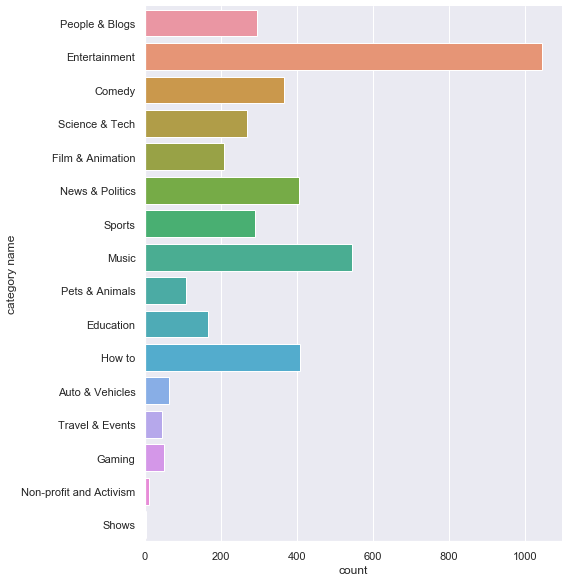

In [6]:
# Number of Category Types in the Dataset
print("Number of Category Types :", len(vidData["category name"].unique()))

# Number of vids of each category Type
print(vidData["category name"].value_counts())
sb.catplot(y = "category name", data = vidData, kind = "count", height = 8)

# 2. Features Engineering
## Assessing the correlation between potential predictors and the response

Here, we will list out a list of `potential features` that we may use in our prediction and assess whether each feature will be useful for our prediction. 

#### 2.1 - [Numeric Predictors](#2.1.-Numeric-Predictors):
1. Total Likes and Dislikes
2. Trend Day Count
3. Trend Publish Difference 
4. Subscribers
5. Comments
6. Tags Count
7. Tag in title count
8. Length of title
9. Word Count in title
10. Capital Letters in title 
11. Punctuations in title

#### 2.2 - [Time Predictors](#2.2.-Timeframe-Predictors):
12. Publish day
13. Publish month

#### 2.3 - [Text Predictors](#2.3.-Text-Predictors):
14. Title Words
15. Tags

#### Response: Whether video crosses 100 thousand views.

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Clustering](#3.-Clustering))

### Creating Decision Tree Models Function
To test and observe if each individual `potential features` may be a good predictor. We use this for univariate classification for our individual predictors.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Creating a decision model function to see whether the predictor is useful
def decision_model(z): #z is predictor name
    #spliting data into 75% test and 25% into train which is by default
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(z), pd.DataFrame(vidData['Above100KViews']), test_size = 0.25)

    dectree = DecisionTreeClassifier(max_depth = 15)
    dectree.fit(x_train, y_train)

    # Predict response corresponding to predictor
    y_train_pred = dectree.predict(x_train)
    y_test_pred = dectree.predict(x_test)
    
    # Plot the two-way Confusion Matrix (Train)
    f,axes=plt.subplots()
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 30})
    bot, top = plt.ylim() # discover the values for bottom and top
    bot += 0.5 # Add 0.5 to the bottom
    top -= 0.5 # Subtract 0.5 from the top
    plt.ylim(bot, top) # update the ylim(bottom, top) values
    plt.show()
    
    f,axes=plt.subplots()
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 30})
    bot, top = plt.ylim() # discover the values for bottom and top
    bot += 0.5 # Add 0.5 to the bottom
    top -= 0.5 # Subtract 0.5 from the top
    plt.ylim(bot, top) # update the ylim(bottom, top) values
    plt.show()
    
    cm = confusion_matrix(y_train, y_train_pred)
    a=cm[0][0]
    b=cm[0][1]
    c=cm[1][0]
    d=cm[1][1]
    
    cmt = confusion_matrix(y_test, y_test_pred)
    e=cmt[0][0]
    f=cmt[0][1]
    g=cmt[1][0]
    h=cmt[1][1]
    
    trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
    truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]
    r2_train = dectree.score(x_train, y_train)
    r2_test = dectree.score(x_test, y_test)

    data2=[[r2_train,r2_test],trueNegativeRate, truePositiveRate]
    df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Dataset','Test Dataset'])
    return df2

# 2.1. Numeric Predictors

## Predictor 1: Total Likes and Dislikes

Here, we sum up total viewer interaction based on the total number of likes and dislikes (`TotalLikesDislikes`). It would be more accurate to assess them based on the number of likes and dislikes as each viewer can only contribute to one like or dislike.

`TotalLikesDislikes` is an uncontrolled predictor, where it is out of the control of the user. It may be an indicator of virality.

(Back to [Features Engineering](#2.-Features-Engineering))

In [8]:
# Altered to include total interactions (likes+Dislikes) 
vidData['TotalLikesDislikes']=vidData['likes']+vidData['dislikes']

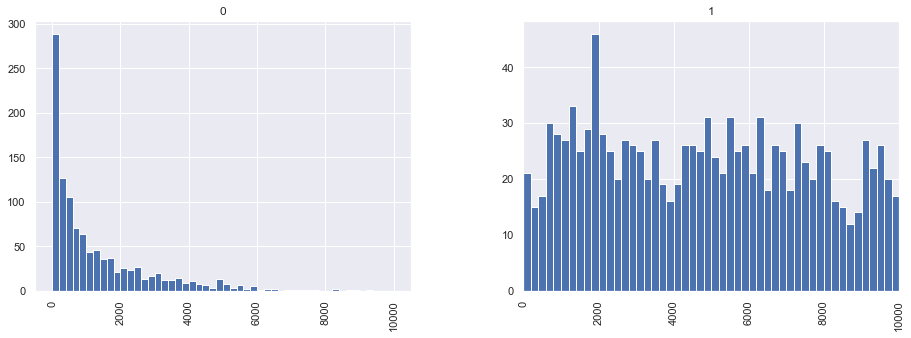

In [9]:
#Likes + Dislikes visualisation
%matplotlib inline

vidData.hist(by='Above100KViews',column='TotalLikesDislikes',bins=50,figsize=[15,5],range=[0,10000])
plt.xlim(0,10000);

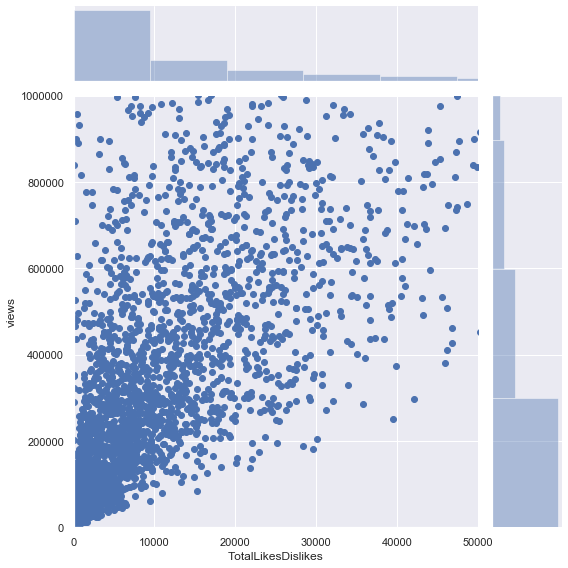

In [10]:
# Jointplot of Total Views against Total Likes and Dislikes
TotalLikesDislikes=vidData['TotalLikesDislikes']
views=vidData['views']
sb.jointplot(TotalLikesDislikes, views, data=vidData, height = 8, 
             marginal_kws=dict(bins=500),
             xlim=[0,50000], ylim=[0,1000000])

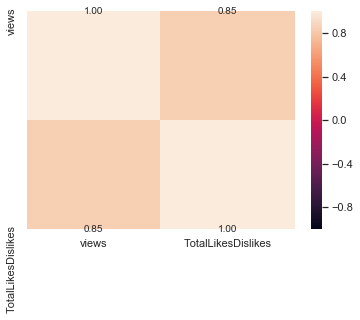

In [11]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([views, TotalLikesDislikes.reindex(index=TotalLikesDislikes.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

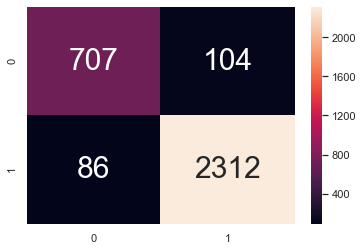

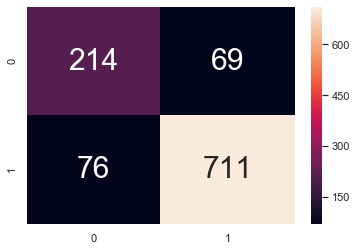

,Train Dataset,Test Dataset
Classification accuracies,0.940792,0.864486
True Negative Rate,0.871763,0.756184
True Positive Rate,0.964137,0.903431


In [12]:
# Decision Tree
decision_model(vidData['TotalLikesDislikes'])

### Observations
There is a much higher viewer interaction for videos with >100,000 views based on the total number of likes and dislikes (`TotalLikesDislikes`) they garner compared to videos with <100,000 views. Whilst it might seem to be both the _cause and effect_ of garnering views, it is __likely to be a useful predictor__ as greater interaction generates buzz and invokes more people to view the videos.

Furthermore, the joint plot and the correlation matrix shows that there is a strong positive correlation between `TotalLikesDislikes` and `views` as shown from a correlation coefficient of `0.85`, coupled with a pretty high classification accuracy of train and test data as shown in the above table.

## Predictor 2: Trend Day Count
Trend day count is the number of days a video stays on the trending page.

(Back to [Features Engineering](#2.-Features-Engineering))

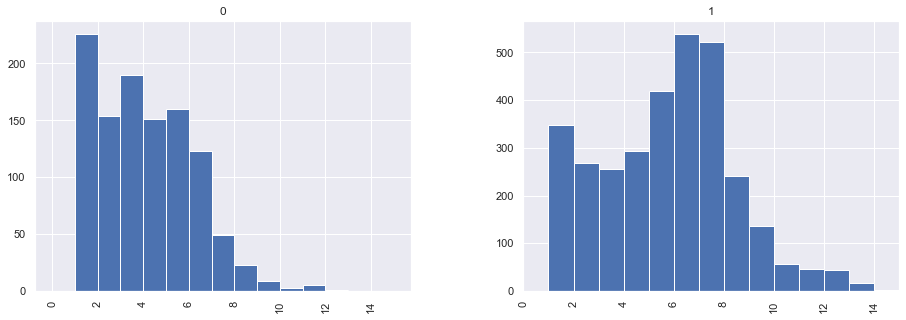

In [13]:
#Trend Day Count
%matplotlib inline

vidData.hist(by='Above100KViews',column='trend_day_count',bins=15,figsize=[15,5],range=[0,15])
plt.xlim(0,15);

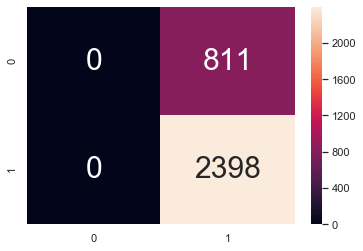

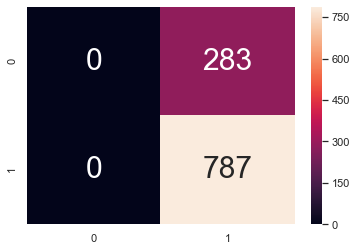

,Train Dataset,Test Dataset
Classification accuracies,0.747273,0.735514
True Negative Rate,0.000000,0.000000
True Positive Rate,1.000000,1.000000


In [14]:
decision_model(vidData['trend_day_count'])

### Observations
Videos with >100,000 views seem to appear on the trending section for a __greater number of days__ than those that don't. Although intuitive, this reaffirms the notion that staying on the trending page for a longer period increases views.

However, the classification accuracies of our train and test data are relatively low in this dataset, thus it __may not be as important a predictor__ in our model.

## Predictor 3: Trend Publish Difference

The number of days the video took to get on the trending page after its date of publish.

(Back to [Features Engineering](#2.-Features-Engineering))

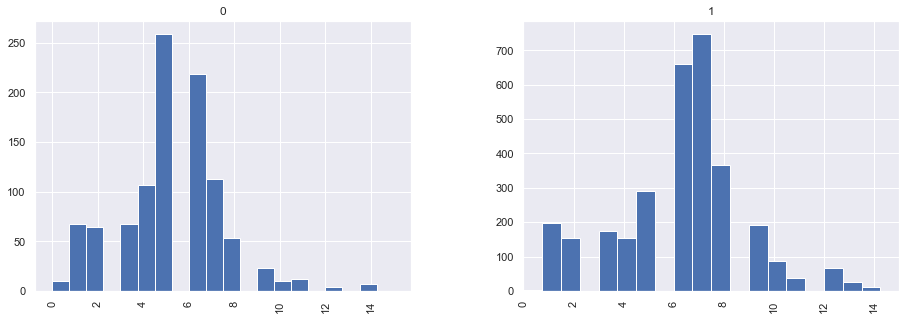

In [15]:
#Trend Publish Difference
%matplotlib inline

vidData.hist(by='Above100KViews',column='trend.publish.diff',bins=20,figsize=[15,5],range=[0,15])
plt.xlim(0,15);

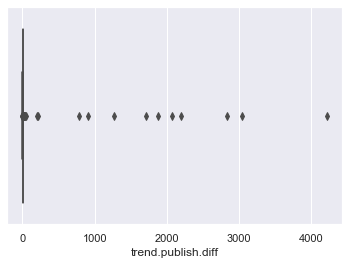

In [16]:
sb.boxplot(x=above100["trend.publish.diff"])

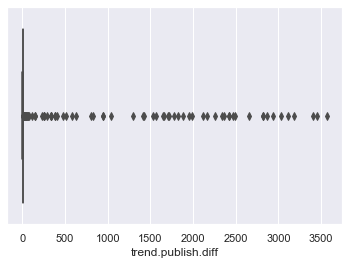

In [17]:
sb.boxplot(x=under100["trend.publish.diff"])

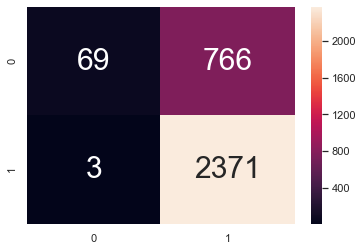

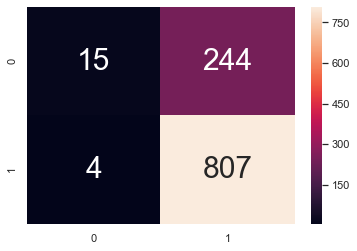

,Train Dataset,Test Dataset
Classification accuracies,0.760361,0.768224
True Negative Rate,0.082635,0.057915
True Positive Rate,0.998736,0.995068


In [18]:
decision_model(vidData['trend.publish.diff'])

### Observations
From the histogram, videos that trend a few days after being published are likely to have garnered a greater number of views than videos which trend a month after being published.

#### Limitations
However, this predictor may be flawed as some videos may be __seasonal__ and appear on the trending page each year during a particular season. This results in their `trend.publish.diff` being much larger than the other trending videos, as seen from the box plots. 

Therefore, this predictor is not indicative of how the difference in the number of days between `last_trending_date` and `publish_date` may affect the viewership of the video. Thus, we __might drop this predictor__ in our model depending on how it fares in the multi-variate classification accuracies with other predictors.

## Predictor 4: Subscriber Count

We thought that `subscriber` count may be a useful predictor since it is intuitive that a large subscriber base of a channel will garner higher viewership of the video.

This predictor is within the control of the user, where they can leverage on their subscriber base to maximise their viewership and as such, post their video on the channel with the highest subscriber count (if they have multiple channels).

Here, we assess the correlation between `subscriber` and `views`.

(Back to [Features Engineering](#2.-Features-Engineering))

(0, 1500000)

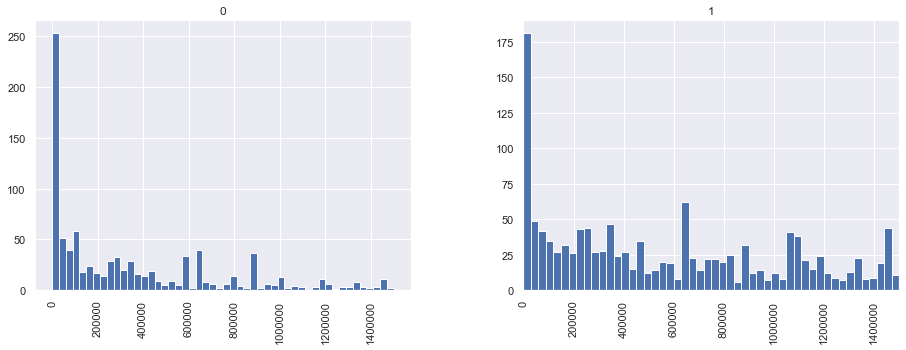

In [19]:
#Subscriber
%matplotlib inline

vidData.hist(by='Above100KViews',column='subscriber',bins=50,figsize=[15,5],range=[0,1500000])
plt.xlim(0,1500000)

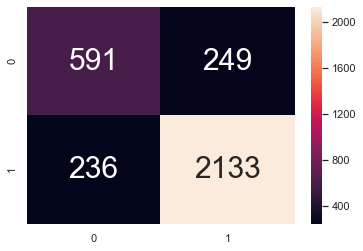

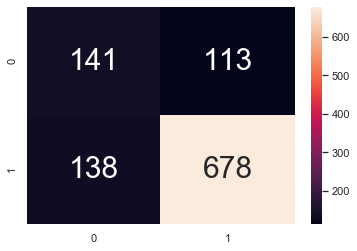

,Train Dataset,Test Dataset
Classification accuracies,0.848863,0.765421
True Negative Rate,0.703571,0.555118
True Positive Rate,0.900380,0.830882


In [20]:
vidData['subscriber'].astype(int)
decision_model(vidData['subscriber'])

### Observations
A larger proportion of the videos that cross 100 thousand views appears to be posted by channels with a much larger subscriber base. This is likely due to the loyalty of the subscribers as well as credibility of the channel owner's videos. Therefore, it is __likely an important predictor.__

#### Limitations
However, while a larger subscriber base may indicate high potential viewership, it may not always be the case due to many other factors affecting it. On the other hand, videos with a small subscriber base may also sometimes garner high viewership due to it going viral.

## Predictor 5: Comment Count

Here, we assess the relationship between the `views` against `comment_count`. It is an uncontrolled variable which is out of the control of the user, and this is also an indicator of viewer interaction.

Viewers may post validative comments, feedback or replies to the video and the channel may reply to these comment to generate more buzz and viewer interaction. Therefore, we thought that this may be a predictor worth assessing.

(Back to [Features Engineering](#2.-Features-Engineering))

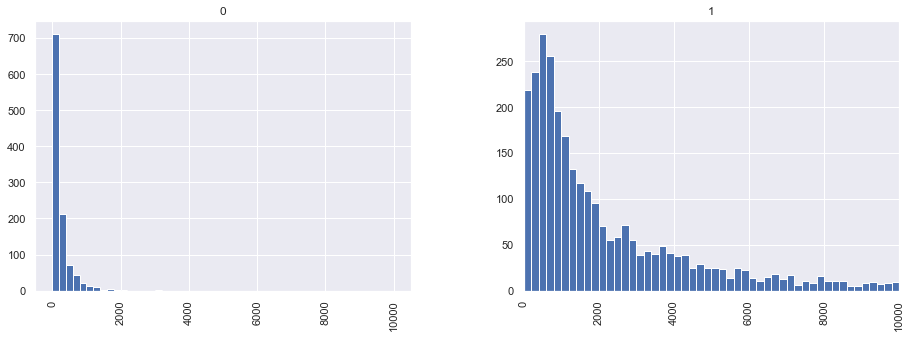

In [21]:
#Comment Count
%matplotlib inline

vidData.hist(by='Above100KViews',column='comment_count',bins=50,figsize=[15,5], range=[0,10000])
plt.xlim(0,10000);

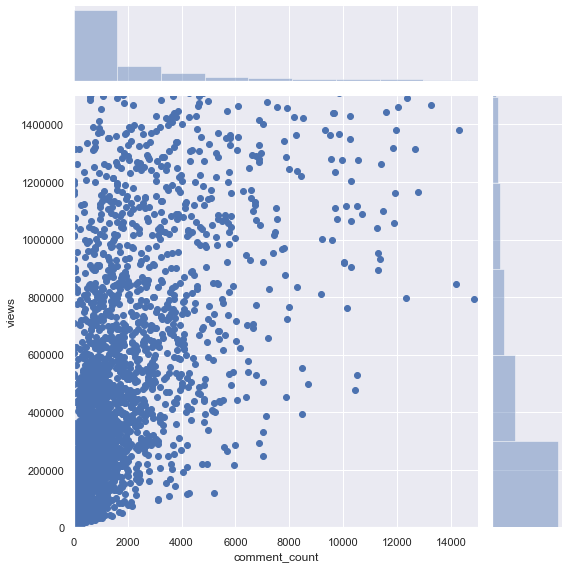

In [22]:
# Jointplot of Total Views against Comment Count
comment_count=vidData['comment_count']
views=vidData['views']
sb.jointplot(comment_count, views, data=vidData, height = 8, 
             marginal_kws=dict(bins=500),
             xlim=[0,15000], ylim=[0,1500000])

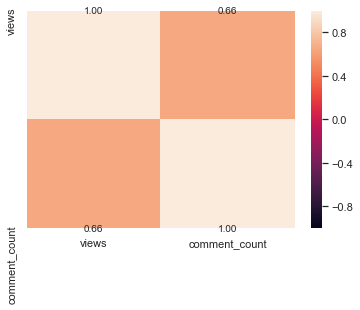

In [23]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([views, comment_count.reindex(index=comment_count.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

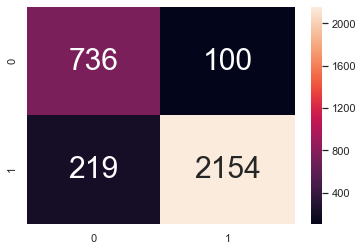

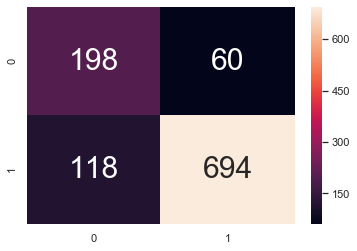

,Train Dataset,Test Dataset
Classification accuracies,0.900592,0.833645
True Negative Rate,0.880383,0.767442
True Positive Rate,0.907712,0.854680


In [24]:
decision_model(vidData['comment_count'])

### Observations
Videos with >100,000 views appear to have a significantly higher number of comments.

Similar to likes and dislikes, although it is both a cause and effect, comments also generate buzz which further increase viewership and hence __may make a good predictor as well__.

From the jointplot and the correlation matrix, there can be seen a positive correlation between the 2 variables with a correlation coefficient of `0.66`. 

#### Limitations
- Insufficient data to ensure that the comments are purely related to the video, i.e. viewer validation comments and replies by the users
- May contain spam comments by other viewers i.e. promotional comments. 

## Predictor 6: Tags Count

We chose this predictor as it is intuitive that adding more tags enables the video to appear on searches more easily due to it having more related keywords, therefore garnering more views.

Thus, here, we assess if the number of tags used in each video `tags_count` correlates with the number of views the video garners. 

(Back to [Features Engineering](#2.-Features-Engineering))

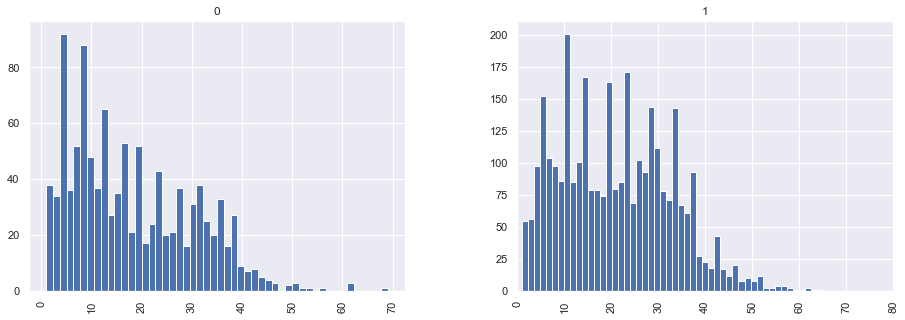

In [25]:
#Tags_count
%matplotlib inline

vidData.hist(by='Above100KViews',column='tags_count',bins=50,figsize=[15,5])
plt.xlim(0,80);

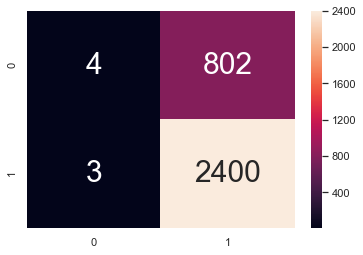

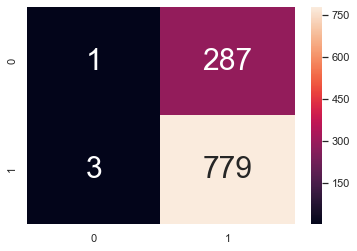

,Train Dataset,Test Dataset
Classification accuracies,0.749143,0.728972
True Negative Rate,0.004963,0.003472
True Positive Rate,0.998752,0.996164


In [26]:
decision_model(vidData['tags_count'])

### Observations

A higher proportion of videos with >100,000 views appear to have a higher number of tags used in its description.

## Predictor 7: Tag in title count

Some videos have tags included in their titles, making it a higher likelihood of appearing on search engines when users search for the corresponding keywords. Therefore, we want to assess whether the number of tags appearing in the title `tags_appeared_in_title_count` has any significant impact on the `views`.

(Back to [Features Engineering](#2.-Features-Engineering))

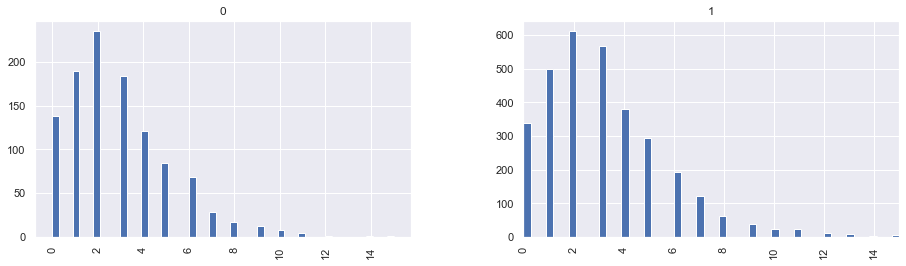

In [27]:
#tags appeared in title count

vidData.hist(by='Above100KViews',column='tag_appeared_in_title_count',bins=50,figsize=[15,4],range=[0,15])
plt.xlim(0,15);

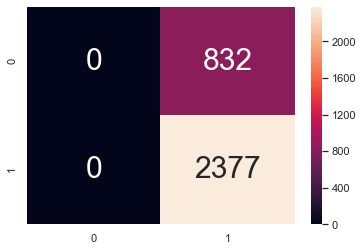

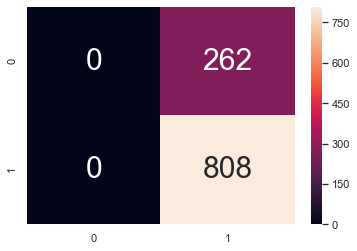

,Train Dataset,Test Dataset
Classification accuracies,0.740729,0.75514
True Negative Rate,0.000000,0.00000
True Positive Rate,1.000000,1.00000


In [28]:
decision_model(vidData['tag_appeared_in_title_count'])

### Observations

From the histogram, it seems that there is little correlation between tags in title count and the number of views the video gets since regardless of the number of views, the median number of tags in title count remains at 2.

As such, while tags in title count may potentially help to increase viewership of the video through its increased searchability, its significance is not highlighted in this dataset as the median count for it remains low for all videos and may hence be an __untapped__ factor in this dataset and hence we may not use it as a predictive feature.

## Predictor 8: Length of Title

We observed that longer titles tend to be clickbaits, and more viewers are likely to click on the video and watch it. Therefore, we want to analyse whether there is a correlation between Length of title and the number of views a video garners.

YouTube title limit is 100 characters, we want to see what is the optimal title length which grabs the most attention and therefore garner more viewers.

(Back to [Features Engineering](#2.-Features-Engineering))

In [29]:
#getting length (total char) in each title
vidData['title_length']=vidData['title'].apply(len)

above100=vidData[vidData['views']>=100000].copy()
under100=vidData[vidData['views']<100000].copy()

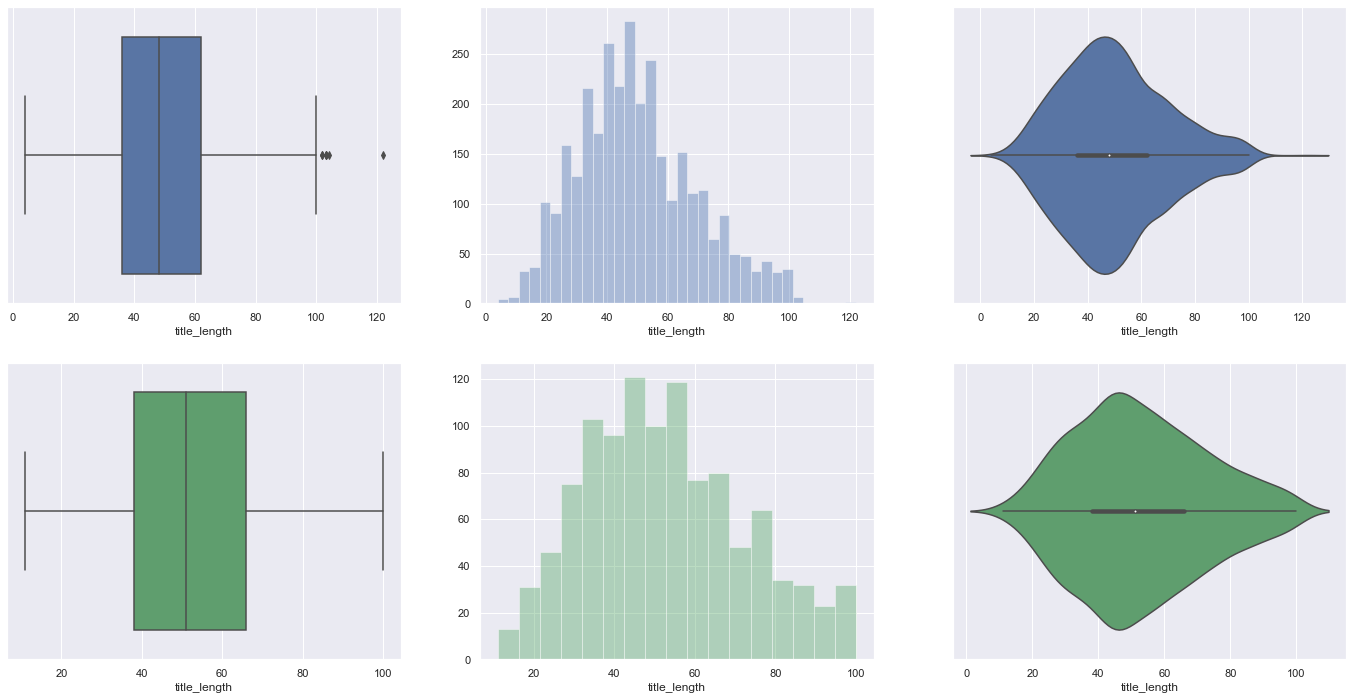

In [30]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for above100['title_length']
sb.boxplot(above100['title_length'], orient = "h", ax = axes[0,0])
sb.distplot(above100['title_length'], kde = False, ax = axes[0,1])
sb.violinplot(above100['title_length'], ax = axes[0,2])

# Plot the basic uni-variate figures for under100['title_length']
sb.boxplot(under100['title_length'], orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(under100['title_length'], kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(under100['title_length'], ax = axes[1,2], color = 'g')

In [33]:
summarytitlelen = pd.DataFrame(under100['title_length'].describe())
summarytitlelen['above100']=above100['title_length'].describe()
summarytitlelen['Total']=vidData['title_length'].describe()
summarytitlelen.columns=["under100titlelength","above100titlelength","Totaltitlelength"]
summarytitlelen.head()

,under100titlelength,above100titlelength,Totaltitlelength
count,1094.000000,3185.000000,4279.000000
mean,52.724863,49.790895,50.541014
std,19.876383,19.420942,19.577948
min,11.000000,4.000000,4.000000
25%,38.000000,36.000000,36.000000


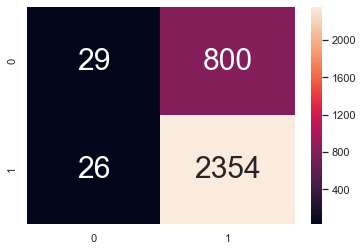

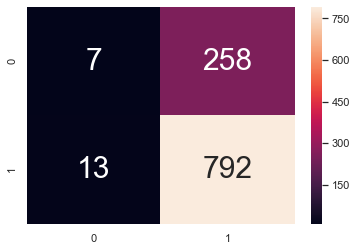

,Train Dataset,Test Dataset
Classification accuracies,0.742599,0.746729
True Negative Rate,0.034982,0.026415
True Positive Rate,0.989076,0.983851


In [34]:
decision_model(vidData['title_length'])

### Observations

The mean of the title length of videos with less than 100,000 views are slightly shorter than that of videos with more than 100,000 views. 

## Predictor 9: Word Count in Title

We thought that some videos with more words in the title may be clickbaits, so we want to assess the importance of the predictor in predicting whether a video will surpass 100,000 views.

(Back to [Features Engineering](#2.-Features-Engineering))

In [35]:
#getting length (tatal number of words) in each title
vidData['title_wordcount']=vidData['title'].apply(lambda x: len([x for x in x.split()]))

above100=vidData[vidData['views']>=100000].copy()
under100=vidData[vidData['views']<100000].copy()

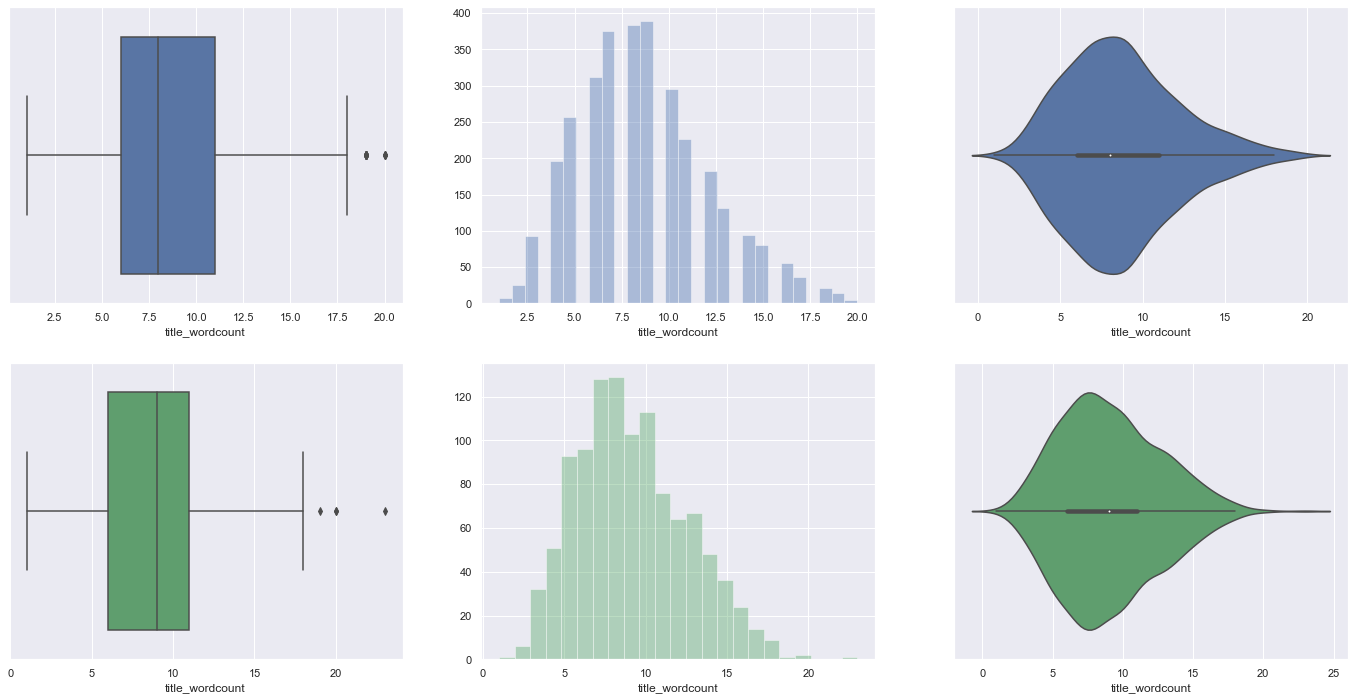

In [36]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for above100['title_wordcount']
sb.boxplot(above100['title_wordcount'], orient = "h", ax = axes[0,0])
sb.distplot(above100['title_wordcount'], kde = False, ax = axes[0,1])
sb.violinplot(above100['title_wordcount'], ax = axes[0,2])

# Plot the basic uni-variate figures for under100['title_wordcount']
sb.boxplot(under100['title_wordcount'], orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(under100['title_wordcount'], kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(under100['title_wordcount'], ax = axes[1,2], color = 'g')

In [37]:
summarywordcount = pd.DataFrame(under100['title_wordcount'].describe())
summarywordcount['above100']=above100['title_wordcount'].describe()
summarywordcount['Total']=vidData['title_wordcount'].describe()
summarywordcount.columns=["under100titlewordcount","above100titlewordcount","Totaltitlelength"]
summarywordcount.head()

,under100titlewordcount,above100titlewordcount,Totaltitlelength
count,1094.000000,3185.000000,4279.000000
mean,9.042048,8.684458,8.775882
std,3.537289,3.438616,3.467207
min,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000


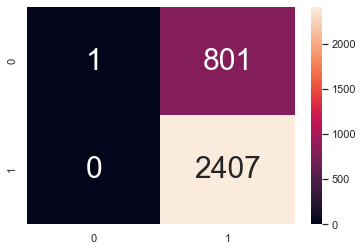

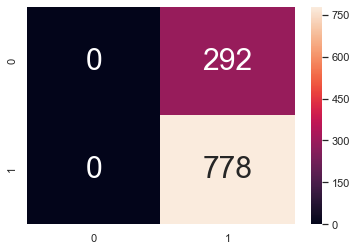

,Train Dataset,Test Dataset
Classification accuracies,0.750390,0.727103
True Negative Rate,0.001247,0.000000
True Positive Rate,1.000000,1.000000


In [38]:
decision_model(vidData['title_wordcount'])

### Observations

There is a slightly shorter mean word count in the title of videos with >100,000 views, thus we think that it might be a __potentially useful predictor__ in our model.

## Predictor 10: Capital letters in Title

Capital letters have an urgent connotation tagged to it. Having capital letters in the title can be attention grabbing and thus induce some sort of emotions amongst viewers, encouraging them to click on the video. 

Therefore, we want to analyse the relationship between the total number of views and the number of capital letters in the title.

(Back to [Features Engineering](#2.-Features-Engineering))

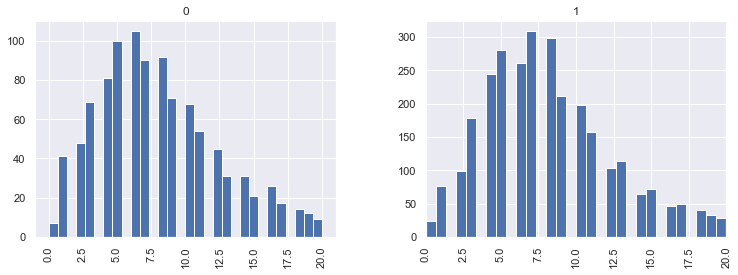

In [39]:
vidData['CAPS']=vidData['title'].apply(lambda x: len([w for w in x.split() for y in w if y.isupper()]))
vidData.hist(column='CAPS',by='Above100KViews',bins=30,figsize=(12,4), range=[0,20]);
plt.xlim([0,20]);

above100=vidData[vidData['views']>=100000].copy()
under100=vidData[vidData['views']<100000].copy()

In [40]:
summarycaps = pd.DataFrame(under100['CAPS'].describe())
summarycaps['above100']=above100['CAPS'].describe()
summarycaps['Total']=vidData['CAPS'].describe()
summarycaps.columns=["under100caps","above100caps","Totalcaps"]
summarycaps.head()

,under100caps,above100caps,Totalcaps
count,1094.000000,3185.000000,4279.000000
mean,9.113346,10.162637,9.894368
std,6.966916,8.372900,8.049117
min,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000


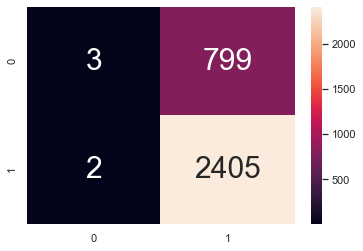

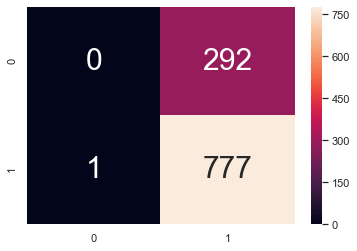

,Train Dataset,Test Dataset
Classification accuracies,0.750390,0.726168
True Negative Rate,0.003741,0.000000
True Positive Rate,0.999169,0.998715


In [41]:
decision_model(vidData['CAPS'])

### Observations

A higher proportion of videos that cross 100 thousand views appear to have a higher number of capital letters `CAPS` used in its title. 

This is likely due to the attention grabbing factor of capital letters and how it may have sparked some curiosity or shock amongst users, garnering more views for the video. Therefore, it may be a __useful predictor__ in predicting the views of the video.

## Predictor 11: Punctuations in Title
Some attention grabbing videos may include punctuations like `?` or `!`, therefore we want to assess whether videos with more views use more punctuations.

(Back to [Features Engineering](#2.-Features-Engineering))

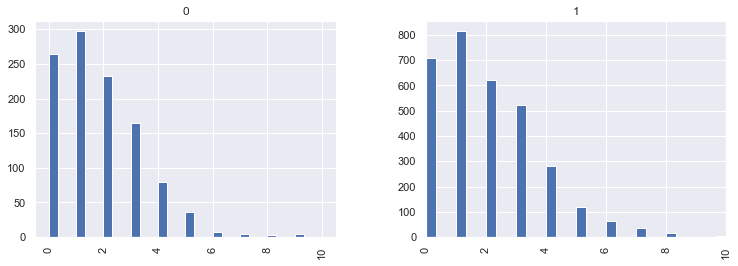

In [42]:
#displaying symbols vs label
import string 

#w is word
#y is character
vidData['symbols']=vidData['title'].apply(lambda x: len([w for w in x.split() for y in w if y in string.punctuation]))
vidData.hist(column='symbols',by='Above100KViews',bins=30,figsize=(12,4), range=[0,10]);
plt.xlim([0,10]);

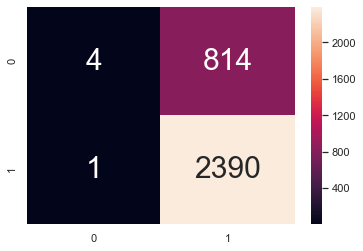

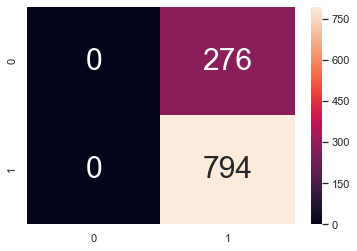

,Train Dataset,Test Dataset
Classification accuracies,0.746027,0.742056
True Negative Rate,0.004890,0.000000
True Positive Rate,0.999582,1.000000


In [43]:
decision_model(vidData['symbols'])

### Observations
Punctuations in title __may not be an important predictor__ as there is an insignificant difference regardless of number of views of the videos.

# 2.2. Timeframe Predictors
## Predictor 12: Day of Publish

We thought that the day of which the video was published may play a part in garnering more views. If, a video was published on the weekends, we thought that it may gain more views as more people watch YouTube videos on the weekend. 

Here, we assess whether `publishDay` is an important predictor in indicating whether a video will garner more views based on its published day.

(Back to [Features Engineering](#2.-Features-Engineering))

In [44]:
# Classifying based on Days of the week (0=Monday, 6=Sunday)
vidData['publishDay']=pd.DatetimeIndex(vidData['publish_date']).weekday

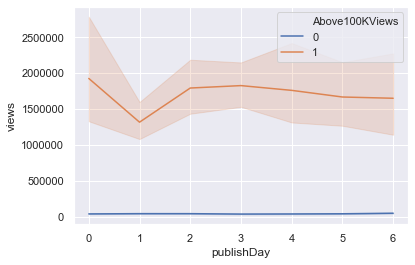

In [45]:
#Day of publish

ax = sb.lineplot(x="publishDay", y="views", hue="Above100KViews",
                  data=vidData)


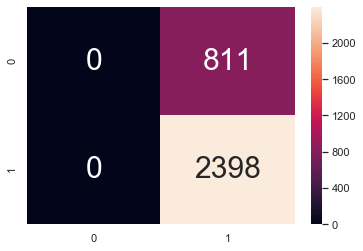

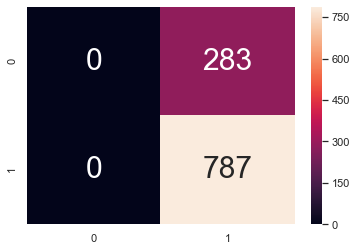

,Train Dataset,Test Dataset
Classification accuracies,0.747273,0.735514
True Negative Rate,0.000000,0.000000
True Positive Rate,1.000000,1.000000


In [46]:
decision_model(vidData['publishDay'])

### Observations

From the lineplot, it can be seen that Tuesday is not a great day to publish videos, but that publishing a video on Friday has a great range of views a video garners as seen from the orange shade. 

#### Limitations
The lineplot was not very clear in showing us the best day to publish videos, especially for videos with <100,000 views. 

We are also unable to conclude if there is even a correlation between the day posted and the number of views the video garners, since views are be accumulated over time and not all on the day of release. Furthermore, we do not have the view count progression data to support this. 

Therefore we will __drop this predictor__ in our model.

## Predictor 13: Month of Publish

Here, we are assessing whether the month of publish affects the viewership of the video.

(Back to [Features Engineering](#2.-Features-Engineering))

In [47]:
vidData['publishMonth']=pd.DatetimeIndex(vidData['publish_date']).month

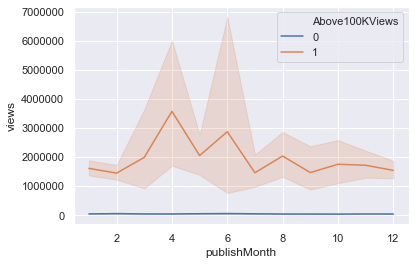

In [48]:
#Month of publish
ax = sb.lineplot(x="publishMonth", y="views", hue="Above100KViews",
                  data=vidData)

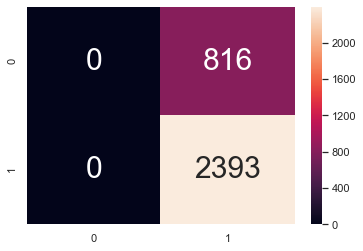

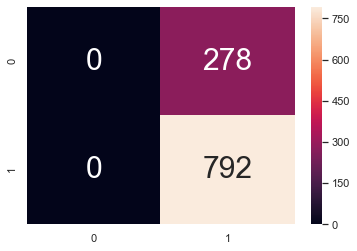

,Train Dataset,Test Dataset
Classification accuracies,0.745715,0.740187
True Negative Rate,0.000000,0.000000
True Positive Rate,1.000000,1.000000


In [49]:
decision_model(vidData['publishMonth'])

### Observations

From the lineplot, it can be seen that videos published in April and June garner more views that that of other months. 

#### Limitations
However, The lineplot was not very clear in showing us the best month to publish videos, especially for videos with <100,000 views. 

We are also unable to conclude if there is even a correlation between the month posted and the viewership of the video, and we do not have the view count progression data to support this. Furthermore, some videos may be seasonal which would result in an unusual spike in viewcounts during certain months.

Therefore we will drop this predictor in our model.

## Classification Accuracies for Numeric Predictors at a glance

Here, we summarise the classification accuracy of each of the univariate features in a single dataframe for easier visualisation.

In [50]:
def summary_dectree(z,index): #z is predictor name
    #spliting data into 75% test and 25% into train which is by default
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(z), pd.DataFrame(vidData['Above100KViews']), test_size = 0.25)

    dectree = DecisionTreeClassifier(max_depth = 15)
    dectree.fit(x_train, y_train)

    a = dectree.score(x_train, y_train)
    b = dectree.score(x_test, y_test)
    data=[[a,b]]
    df = pd.DataFrame(data, columns = ['Classification accuracy of train','Classification accuracy of test'], index=[index])
    return df
    

In [51]:
a='TotalLikesDislikes'
b='trend_day_count'
c='trend.publish.diff'
d='subscriber'
e='comment_count'
f='tags_count'
g='tag_appeared_in_title_count'
h='title_length'
i='title_wordcount'
j='CAPS'
k='symbols'
l='publishDay'
m='publishMonth'


a=summary_dectree(vidData[a],'TotalLikesDislikes')
b=summary_dectree(vidData[b],'trend_day_count')
c=summary_dectree(vidData[c],'trend.publish.diff')
d=summary_dectree(vidData[d],'subscriber')
e=summary_dectree(vidData[e],'comment_count')
f=summary_dectree(vidData[f],'tags_count')
g=summary_dectree(vidData[g],'tag_appeared_in_title_count')
h=summary_dectree(vidData[h],'title_length')
i=summary_dectree(vidData[i],'title_wordcount')
j=summary_dectree(vidData[j],'CAPS')
k=summary_dectree(vidData[k],'symbols')
l=summary_dectree(vidData[l],'publishDay')
m=summary_dectree(vidData[m],'publishMonth')

frames_indiv =[a,b,c,d,e,f,g,h,i,j,k,l,m]
results_indiv = pd.concat(frames_indiv)
results_indiv

,Classification accuracy of train,Classification accuracy of test
TotalLikesDislikes,0.936117,0.871028
trend_day_count,0.746338,0.738318
trend.publish.diff,0.761920,0.757944
subscriber,0.849174,0.758879
comment_count,0.901839,0.824299
tags_count,0.744469,0.744860
tag_appeared_in_title_count,0.744157,0.744860
title_length,0.747585,0.736449
title_wordcount,0.746338,0.738318
CAPS,0.736990,0.767290


# 2.3. Text Predictors

## Text Preprocessing: Tokenisation

Tokenisation is the process to assign each word in the messages a vector so that it could be analysed using the Natural Language Toolkit `NLTK` module.

This is achieved by processing the text via `lemmatization` and `stemming` of the words in the title and tags, and then `CountVectorizing` the words to create a sparse matrix. This will be elaborated in the following subsections:

- [Title Preprocessing](#Predictor-14:-Title-preprocessing)
- [Tags Preprocessing](#Predictor-15:-TAGS-preprocessing)
    1. Concatenated Tags
    2. Lemmatized Tags
    
(Back to [Features Engineering](#2.-Features-Engineering))

## Predictor 14: Title preprocessing

In [52]:
#Download stopwords
import string
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephinehemingway/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephinehemingway/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Function to clean title text into items in LISTS

In this process, we carry out the following:
- remove punctuations
- remove stopwords
- return clean words

This enables us to visualise and count the top words in titles of the videos in both categories: >100,000 views and <100,000 views.

In [53]:
def process_list(text):
    #removing punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #return clean words
    return clean_words

In [54]:
vidData['title'].head()

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

In [55]:
# Clean words in lists
vidDatatext= vidData['title'].apply(process_list)
vidDatatext.head()

0                               [WANT, TALK, MARRIAGE]
1    [Trump, Presidency, Last, Week, Tonight, John,...
2    [Racist, Superman, Rudy, Mancuso, King, Bach, ...
3                     [Nickelback, Lyrics, Real, Fake]
4                                  [Dare, GOING, BALD]
Name: title, dtype: object

In [56]:
vidData_above100k=vidData[vidData['Above100KViews']==True].copy()
vidData_under100k=vidData[vidData['Above100KViews']==False].copy()

In [57]:
vidData_above100k.loc[:, 'title'] = vidData_above100k['title'].apply(process_list)
titlewords_above100k = vidData_above100k['title'].tolist()
vidData_under100k.loc[:, 'title'] = vidData_under100k['title'].apply(process_list)
titlewords_under100k = vidData_under100k['title'].tolist()

### 2. Top 30 words in titles: Barplot Visualisation

In [64]:
list_good_words = []
for sublist in titlewords_above100k:
    for item in sublist:
        list_good_words.append(item)
list_bad_words = []
for sublist in titlewords_under100k:
    for item in sublist:
        list_bad_words.append(item)

In [65]:
c_good  = Counter(list_good_words)
c_spam = Counter(list_bad_words)
top30_good  = pd.DataFrame(c_good.most_common(30),  columns=['title_word', 'count'])
top30_bad = pd.DataFrame(c_spam.most_common(30), columns=['title_word', 'count'])

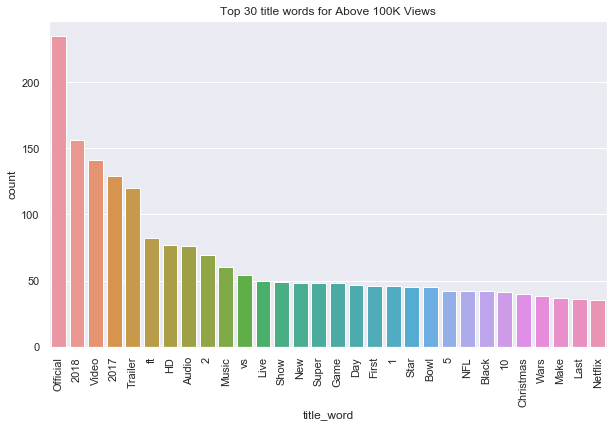

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(x='title_word', y='count', 
            data=top30_good, ax=ax)
plt.title("Top 30 title words for Above 100K Views")
plt.xticks(rotation='vertical');

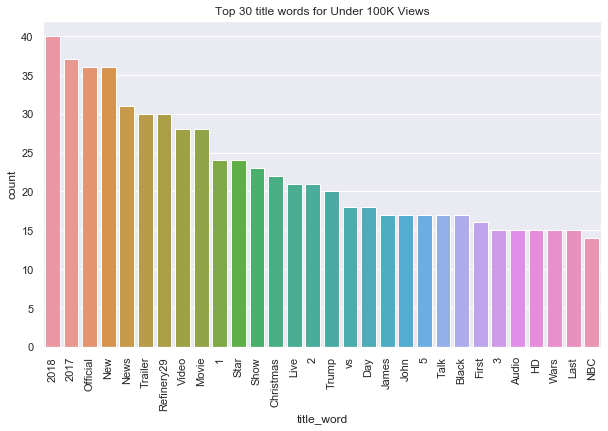

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(x='title_word', y='count', 
            data=top30_bad, ax=ax)
plt.title("Top 30 title words for Under 100K Views")
plt.xticks(rotation='vertical');

### 3. Function to clean title text into STRINGS
In this process, we carry out the following:
- remove punctuations
- remove stopwords
- lemmatize the text
- stem the text
- return clean words

This process is different than the one we did above. In the above function, we returned the clean text in a __list__ while in this function, we return the clean text in __strings__ for vectorization purposes. 

In this process, we also incorporated stemming and lemmatization to remove variations in words for better analysis.

#### Definitions
- `Stemming` refers to truncating the ends of words in hopes of achieving its base form.

- `Lemmatization` refers to analysing the words with the use of vocabulary to remove inflectional endings and return the infinitive form of the word (`lemma`).




In [68]:
def process_string(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nodigits = [char for char in nopunc if not char.isdigit()]
    nodigits = ''.join(nodigits)
    
    #lemmatizer/stemmer
    lemmatizer=nltk.stem.WordNetLemmatizer()
    stemmer=nltk.stem.PorterStemmer()
    lemmatized_text=lemmatizer.lemmatize(nodigits,pos='v')
    stemmed_text=stemmer.stem(lemmatized_text)
    
    clean_words = [word for word in stemmed_text.split() if word.lower() not in stopwords.words('english')]
    #return clean phrases
    return ' '.join(clean_words)

In [63]:
vidDataString = vidData['title'].apply(process_string)
#removing irrelevant characters and symbols
vidDataString = vidDataString.str.replace(r'[^\x00-\x7F]+', '')
vidDataString

0                                       want talk marriag
1       trump presidency last week tonight john oliver...
2         racist superman rudy mancuso king bach lele pon
3                              nickelback lyrics real fak
4                                         dare going bald
                              ...                        
4274                            progress bars wrong often
4275                                 bluetooth still suck
4276    crazy frosting recipe best buttercream frostin...
4277    satellites capture megapixel images earths glo...
4278       possible bend light finger light bender experi
Name: title, Length: 4279, dtype: object

### 4. Vectorizing using CountVectorizer and Bag-of-Words (BoW)

Bag-of-words is a way of simplifying and representing text data with machine learning algorithms.

`CountVectorizer()` is to count the number of occurrences of each word in each message, resulting in a sparse array with the rows corresponding to index of message and columns corresponding to the different vocabulary.


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer1 = CountVectorizer(min_df=0.0)
bow_matrix1 = bow_transformer1.fit_transform(vidDataString)
bow_matrix1 = bow_matrix1.toarray()

#counting the number of different words in the text
vocabTitle = bow_transformer1.get_feature_names()

In [70]:
len(vocabTitle)

8504

In [71]:
title_matrix = pd.DataFrame(bow_matrix1,columns=vocabTitle)
title_matrix.head()

,aaliyahjay,aap,aaron,abandona,abandoned,abbey,abbi,abc,ablaze,aboah,...,zombie,zombies,zone,zoo,zooey,zotto,zu,zuma,zurita,zylka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Comments
Since there are 8504 features (each word in vocab takes one feature), we want to concentrate on the top 2000 most used words in the titles.

This helps to remove words that are not as commonly used , which thus have little help in improving our prediction model.

In [72]:
title_matrix_improved=pd.DataFrame({'mean frequency': title_matrix.mean(axis=0)},index= title_matrix.columns)
Top_title_words = title_matrix_improved.sort_values(by='mean frequency', ascending=False)
Top_title_words.head()

,mean frequency
official,0.066371
video,0.045805
new,0.041365
trailer,0.026642
ft,0.022201


In [73]:
Top2000TitleWords= title_matrix[Top_title_words.index[:2000]]
Top2000TitleWords.head()

,official,video,new,trailer,ft,audio,vs,hd,live,first,...,jay,children,played,crisi,louis,planes,jersey,planet,jerry,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Most Commonly Used Words: Wordcloud Visualisation

Shows the most frequently used video title words. The more common words in each category (>100,000 or <100,000 views) of videos will appear larger compared to the less commonly used words.

In [74]:
import wordcloud
def show_wordcloud(above_or_under, title):
    text = ' '.join(above_or_under['title'].apply(process_string).astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

### Most Common Words in title for videos above 100K Views

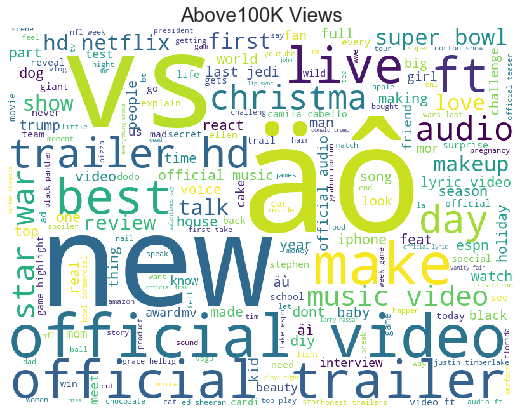

In [75]:
show_wordcloud(above100,'Above100K Views')

### Most Common Words in title for videos under 100K Views

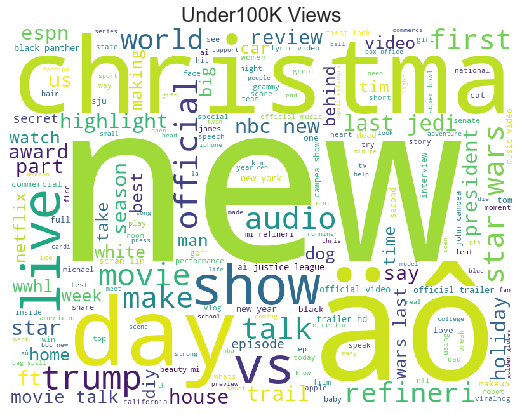

In [76]:
show_wordcloud(under100,'Under100K Views')

### 6. Calculating Classification Accuracies with Decision Tree Model

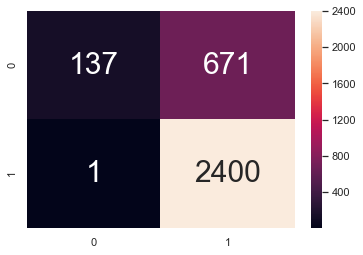

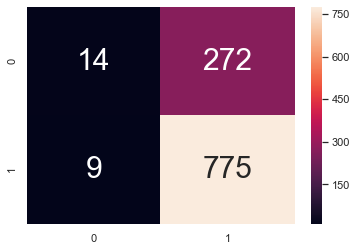

,Train Dataset,Test Dataset
Classification accuracies,0.790589,0.737383
True Negative Rate,0.169554,0.048951
True Positive Rate,0.999584,0.988520


In [77]:
decision_model(Top2000TitleWords)

## Predictor 15: TAGS preprocessing

### 1. Function to clean tags into STRINGS

First, we want to analyse the tags based on its uniqueness, so we start off by analysing the `concatenated tags` to see which is the most used tags. 

However, these `concatenated tags` are difficult to decipher from the NLTK dictionary, therefore we decided to analyse the `lemmatized tags`, where the tags are analysed on their individual words and are lemmatized and stemmed for meaningful study of the tags used in the videos.

These `lemmatized tags` will then be `CountVectorized` and then used for our clustering.

Therefore, this section will include 2 subsections:
- A. Concatenated Tags
- B. Lemmatized Tags

In [78]:
vidData['tags'].head()

0                                      SHANtell martin
1    last week tonight trump presidency|last week t...
2    racist superman|rudy|mancuso|king|bach|racist|...
3    rhett and link|gmm|good mythical morning|rhett...
4    ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...
Name: tags, dtype: object

In [79]:
vidData['tags']=vidData['tags'].astype(str)

### A. Concatenated Tags

Here, we concatenate the phrases within each tag to process the tags and see the top used tags.

In [80]:
def process_tags(tags):
    #split tags based on char '|'
    clean_tags = [phrase for phrase in tags.split('|')]
    concat_tags = [x.replace(" ","") for x in clean_tags]
    #return clean phrases
    return ' '.join(concat_tags)

In [87]:
vidDatatags= vidData['tags'].apply(process_tags)
vidDatatags = vidDatatags.str.replace(r'[^\x00-\x7F]+', '') #removing symbols
vidDatatags.head

<bound method NDFrame.head of 0                                          SHANtellmartin
1       lastweektonighttrumppresidency lastweektonight...
2       racistsuperman rudy mancuso king bach racist s...
3       rhettandlink gmm goodmythicalmorning rhettandl...
4       ryan higa higatv nigahiga idareyou idy rhpc da...
                              ...                        
4274    progress bar estimate time windows inaccurate ...
4275    TechInsider TI Tech Science Innovation Digital...
4276    Frosting CrazyFrosting ButtercreamFrosting Bes...
4277    himawari goes-16 goes-r goes-s weather meteoro...
4278    light bend lightbender bender finger crazy awe...
Name: tags, Length: 4279, dtype: object>

In [85]:
pd.DataFrame(vidDatatags).head()

,tags
0,SHANtellmartin
1,lastweektonighttrumppresidency lastweektonight...
2,racistsuperman rudy mancuso king bach racist s...
3,rhettandlink gmm goodmythicalmorning rhettandl...
4,ryan higa higatv nigahiga idareyou idy rhpc da...


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(min_df=0.0)
bow_matrix = bow_transformer.fit_transform(vidDatatags)
bow_matrix = bow_matrix.toarray()
#counting the number of different words in the text
vocab = bow_transformer.get_feature_names()
vocab = list(set(vocab))
tags_matrix1 = pd.DataFrame(bow_matrix,columns=vocab)
tags_matrix1.head()

,han,pixel2xlvsiphonexcamera,vsfashionshow2017,modelhelicopter,familymovie,lifewacks,angelina,brettyoung,hanukkah,scale,...,dunkeybestof2017,voicewinner,taste,cleetus,dear,dadteachesgaysonhowtoshoot,raisman,edmdrops,lovebeingsingle,vers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Comments

Since there are 37057 features (each word in vocab takes one feature), We will also be using the same method to extract top 2000 tags in the videos for efficient and more accurate predictions.


In [92]:
FreqTags = pd.DataFrame({'mean frequency': tags_matrix1.mean(axis = 0)}, index = tags_matrix1.columns)
TopTags = FreqTags.sort_values(by='mean frequency', ascending=False)
TopTags.head()

,mean frequency
grahamnortonnew,0.113812
mjolnir,0.103061
design,0.062631
koyne,0.050713
greece,0.045805


In [93]:
Top2000Tags= tags_matrix1[TopTags.index[:2000]]
Top2000Tags.head()

,grahamnortonnew,mjolnir,design,koyne,greece,thecuddlesquad,dictatorship,retail,petticoat,horsetaming,...,upsidedownsmileface,co2,lips,samuelhopkins,trumpbook,falsealert,iphonexvsiphone8,winningticket,them,dwayne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


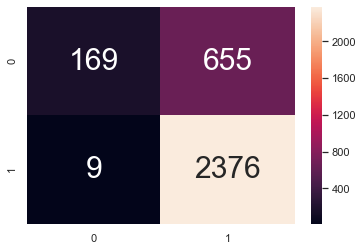

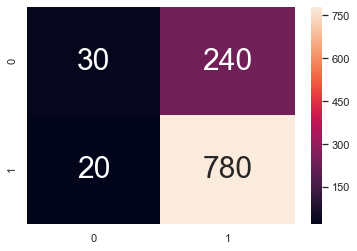

,Train Dataset,Test Dataset
Classification accuracies,0.793082,0.757009
True Negative Rate,0.205097,0.111111
True Positive Rate,0.996226,0.975000


In [94]:
decision_model(Top2000Tags)

### Most Commonly Used Words: Wordcloud Visualisation

Shows the most frequently used video tags. The more common tags in each category (>100,000 or <100,000 views) of videos will appear larger compared to the less commonly used tags.

In [95]:
import wordcloud
def show_wordcloud(above_or_under, title):
    text = ' '.join(above_or_under['tags'].astype(str).apply(process_tags).astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

### Most Common tags for videos above 100K Views

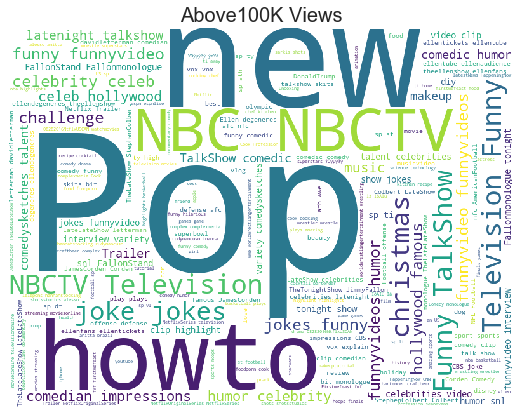

In [96]:
show_wordcloud(above100,'Above100K Views')

### Most Common tags for videos under 100K Views

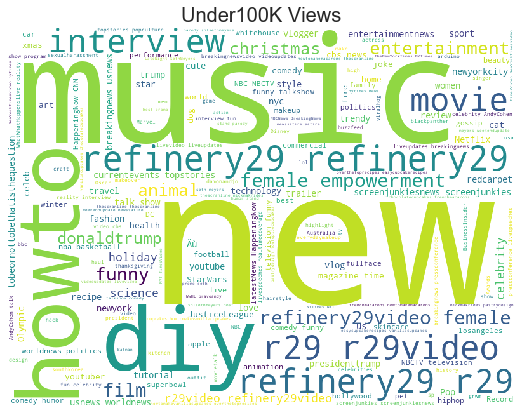

In [97]:
show_wordcloud(under100,'Under100K Views')

### B. Lemmatized Tags

The concatenated tags may be too unique to be clustered, hence we lemmatize the tags so that we can cluster the tags into various clusters. 

In [98]:
def lemmatize_tags(tags):
    #split tags based on char '|'
    clean_tags = [x.replace("|"," ") for x in tags]
    nopunc = [char for char in clean_tags if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nodigits = [char for char in nopunc if not char.isdigit()]
    nodigits = ''.join(nodigits)
    
    #lemmatizer/stemmer
    lemmatizer=nltk.stem.WordNetLemmatizer()
    stemmer=nltk.stem.PorterStemmer()
    lemmatized_text=lemmatizer.lemmatize(nodigits,pos='v')
    stemmed_text=stemmer.stem(lemmatized_text)
    
    clean_words = [word for word in stemmed_text.split() if word.lower() not in stopwords.words('english')]
    #return clean phrases
    return ' '.join(clean_words)

In [99]:
vidDatatags_lemma= vidData['tags'].apply(lemmatize_tags)
#removing irrelevant symbols
vidDatatags_lemma = vidDatatags_lemma.str.replace(r'[^\x00-\x7F]+', '')

In [100]:
a=pd.DataFrame(vidDatatags_lemma)
a.head()

,tags
0,shantell martin
1,last week tonight trump presidency last week t...
2,racist superman rudy mancuso king bach racist ...
3,rhett link gmm good mythical morning rhett lin...
4,ryan higa higatv nigahiga dare idy rhpc dares ...


In [108]:
bow_transformer2 = CountVectorizer(min_df=0.0)
bow_matrix2 = bow_transformer2.fit_transform(vidDatatags_lemma)
bow_matrix2 = bow_matrix2.toarray()

#counting the number of different lemmatized tags
vocab2 = bow_transformer2.get_feature_names()
vocab2 = list(set(vocab2)) #remove duplicate tags

tags_matrix2 = pd.DataFrame(bow_matrix2,columns=vocab2)
tags_matrix2.head()

,veloso,han,mut,feige,youthful,pen,vlogmas,shampoo,crust,huron,...,dear,sites,skyscraper,taste,argus,foodtv,bond,crossfit,kitabatak,almazankitchen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
tags_matrix2.describe()

,veloso,han,mut,feige,youthful,pen,vlogmas,shampoo,crust,huron,...,dear,sites,skyscraper,taste,argus,foodtv,bond,crossfit,kitabatak,almazankitchen
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,...,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000
mean,0.000234,0.000234,0.000234,0.002804,0.000234,0.000234,0.000234,0.001636,0.000234,0.000467,...,0.000234,0.000234,0.000467,0.000234,0.000234,0.000701,0.000935,0.000234,0.000234,0.000234
std,0.015287,0.015287,0.015287,0.061092,0.015287,0.015287,0.015287,0.059192,0.015287,0.021617,...,0.015287,0.015287,0.021617,0.015287,0.015287,0.026472,0.048339,0.015287,0.015287,0.015287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [110]:
FreqTags2 = pd.DataFrame({'mean frequency': tags_matrix2.mean(axis = 0)}, index = tags_matrix2.columns)
TopTags2 = FreqTags2.sort_values(by='mean frequency', ascending=False)
TopTags2.head()

,mean frequency
makeovers,0.237906
liters,0.223884
heineken,0.204487
nesbitt,0.204253
paleo,0.183688


In [111]:
# Extracting top 2000 Tags
Top2000Tags2= tags_matrix2[TopTags2.index[:2000]]
Top2000Tags2.head()

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,ldnr,blogging,princesses,compon,rickyc,stefflon,cerveris,halsey,filament,fairly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


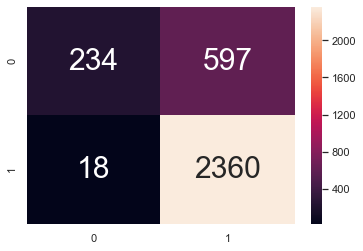

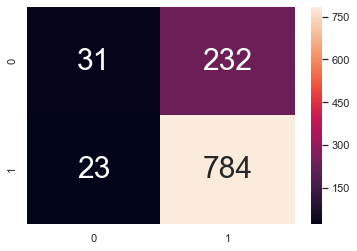

,Train Dataset,Test Dataset
Classification accuracies,0.808352,0.761682
True Negative Rate,0.281588,0.117871
True Positive Rate,0.992431,0.971499


In [113]:
decision_model(Top2000Tags2)

# 3. Clustering
## Tags and Title Words

Clustering is a form of unsupervised learning. We are clustering our `Tags` and `Title` text data to see hidden patterns and also categorize similar videos together in respective clusters.

We will be using various clustering models to cluster our data.
- A. [K-Means Clustering](#A.-K-Means-Clustering)
- B. [DBSCAN Clustering](#B.-DBSCAN-Clustering)
- C. [Hierarchical Agglomerative Clustering](#C.-Hierarchical-Agglomerative-Clustering)
- D. [Manual Clustering](#D.-Manual-Clustering-based-on-categories) (based on `category names`)

We will be using `silhouette scores`, `purity scores` and classification accuracies of `decision trees` and `random forest` to evaluate the accuracies of our clustering algorithms. (see [Evaluating Clustering Algorithms](#Evaluating-Clustering-Algorithms))

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Incorporating all features](#4.-Incorporating-all-features))

### Combining `Top2000Tags2` and `Top2000TitleWords` into one dataframe

`Top2000Tags2` refers to the top 2000 entries in `tags_matrix2`, which is the lemmatized tags matrix. We have decided to use the top 2000 lemmatized tags instead of the concatenated tags as it gives us a higher classification accuracy using the decision tree model.

Here, we will be clustering the videos based on the combined dataframe.

In [114]:
#Place Dataframes side by side for top 2000 tags (lemmatized) and top 2000 title words
horizontal_stack=pd.concat([Top2000Tags2, Top2000TitleWords],axis=1)
horizontal_stack = horizontal_stack.dropna()
horizontal_stack.head()

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,jay,children,played,crisi,louis,planes,jersey,planet,jerry,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## A. K-Means Clustering

K-Means clustering works better on a 2-dimensional array, thus we have decided to compress `tags_matrix2` into 2D via __Singular Value Decomposition__ `SVD`. K-Means clustering involves the following steps:
1. Guess the number of clusters, pick centroids
2. Assign the clusters
3. Plot Angle/Elbow plot to find optimal number of clusters
4. Reassign points and update centroids
5. Iterate until centroids converge and stabilise

`SVD` is used for dimensionality reduction to reduce a multi-dimensional matrix into a n-Dimensional matrix. Compressing the matrix into 2D also helps to eliminate noise in the data, giving rise to more accurate results.

(Back to [clustering](#3.-Clustering))

### Converting horizontal_stack matrix into 2-dimensions using SVD

In [115]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import cluster

# Compressing sparse matrix into 2D
svdT = TruncatedSVD(n_components=2)
svdTfit = svdT.fit_transform(horizontal_stack)
X=svdTfit

### Guess the number of clusters and perform Kmeans Clustering

In [116]:
# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

###  Print the cluster centre as Co-ordinates of Feature

In [117]:
# Print the Cluster Centers
print("Features")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features

Cluster 0:	1.64	1.84	
Cluster 1:	0.3	0.36	
Cluster 2:	8.51	-3.25	


### Labeling the Clusters in the Data

We may use the model on the data to `predict` the clusters.

Within Cluster Sum of Squares : 2883.4501003953733


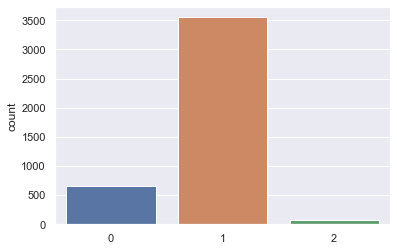

In [118]:
# Predict the Cluster Labels
labels = kmeans.predict(X)
sb.countplot(labels)
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

#### Within Cluster Sum of Squares

WithinSS = 0 : Every data point is a cluster on its own    
WithinSS = Variance : Whole dataset is a single cluster

### Vary the Number of Clusters to obtain a distribution of WithinSS (Elbow Graph)

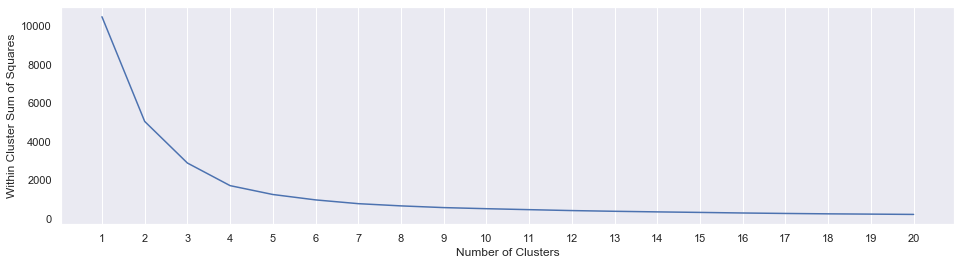

In [119]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 20

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Observations
From the elbow plot, we can see that `4` is the optimal number of clusters before saturation of the datapoints.

### Optimal Clustering
Choosing `4` as the "optimal" number of clusters based on the elbow plot.

Cluster 0:	2.91	0.32	
Cluster 1:	8.55	-3.29	
Cluster 2:	0.28	0.37	
Cluster 3:	1.05	2.41	

Within Cluster Sum of Squares : 1712.4408123953517



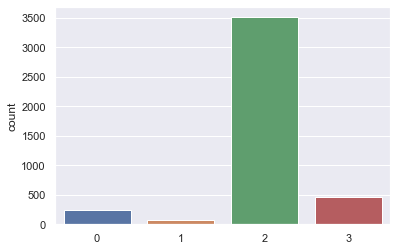

In [120]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Summary of the Cluster Labels
sb.countplot(labels)

### To see the video categories corresponding to the video clusters

In [121]:
import sys
np.set_printoptions(threshold=sys.maxsize)
array2 = vidData['category name'].values
count = 0;
for i in labels:
    print(count,": ",i," ",array2[count])
    count+=1;

0 :  2   People & Blogs
1 :  2   Entertainment
2 :  2   Comedy
3 :  2   Entertainment
4 :  2   Entertainment
5 :  2   Science & Tech
6 :  0   Entertainment
7 :  2   Science & Tech
8 :  2   Film & Animation
9 :  2   News & Politics
10 :  2   Sports
11 :  2   Entertainment
12 :  3   Music
13 :  2   News & Politics
14 :  2   Pets & Animals
15 :  2   Science & Tech
16 :  2   Comedy
17 :  2   Education
18 :  2   Science & Tech
19 :  2   Education
20 :  2   Education
21 :  2   Science & Tech
22 :  2   Education
23 :  3   How to
24 :  0   Comedy
25 :  2   Entertainment
26 :  2   Science & Tech
27 :  2   How to
28 :  2   News & Politics
29 :  2   Film & Animation
30 :  2   Auto & Vehicles
31 :  2   Entertainment
32 :  2   Music
33 :  2   Entertainment
34 :  2   Travel & Events
35 :  2   People & Blogs
36 :  2   Film & Animation
37 :  2   Music
38 :  2   Comedy
39 :  2   Music
40 :  2   Music
41 :  3   News & Politics
42 :  2   Music
43 :  2   People & Blogs
44 :  3   How to
45 :  2   Entertain

562 :  2   Entertainment
563 :  2   Education
564 :  2   Music
565 :  2   Entertainment
566 :  2   Science & Tech
567 :  2   Comedy
568 :  0   Comedy
569 :  0   Comedy
570 :  2   Entertainment
571 :  2   Film & Animation
572 :  2   Science & Tech
573 :  2   Music
574 :  2   Film & Animation
575 :  2   Film & Animation
576 :  2   Music
577 :  2   Science & Tech
578 :  2   Entertainment
579 :  3   How to
580 :  2   How to
581 :  2   Entertainment
582 :  2   Entertainment
583 :  2   Music
584 :  2   Entertainment
585 :  2   Sports
586 :  1   Entertainment
587 :  1   Entertainment
588 :  2   Comedy
589 :  2   Film & Animation
590 :  2   Music
591 :  3   Science & Tech
592 :  2   How to
593 :  2   Entertainment
594 :  2   Entertainment
595 :  2   People & Blogs
596 :  2   Music
597 :  2   Entertainment
598 :  2   People & Blogs
599 :  3   How to
600 :  2   Entertainment
601 :  2   Gaming
602 :  3   Entertainment
603 :  2   Sports
604 :  2   Entertainment
605 :  2   Music
606 :  2   Music
60

1085 :  2   Entertainment
1086 :  2   News & Politics
1087 :  2   Entertainment
1088 :  2   Film & Animation
1089 :  2   Gaming
1090 :  0   Comedy
1091 :  2   Entertainment
1092 :  2   Science & Tech
1093 :  1   Entertainment
1094 :  2   Education
1095 :  3   Entertainment
1096 :  0   Comedy
1097 :  2   Comedy
1098 :  2   News & Politics
1099 :  2   Entertainment
1100 :  2   Entertainment
1101 :  0   Comedy
1102 :  2   Comedy
1103 :  2   Education
1104 :  2   News & Politics
1105 :  3   Entertainment
1106 :  2   Education
1107 :  2   Entertainment
1108 :  2   News & Politics
1109 :  3   News & Politics
1110 :  2   Sports
1111 :  2   Pets & Animals
1112 :  3   Entertainment
1113 :  2   Entertainment
1114 :  3   Entertainment
1115 :  2   People & Blogs
1116 :  2   Entertainment
1117 :  2   Film & Animation
1118 :  2   News & Politics
1119 :  2   Science & Tech
1120 :  2   How to
1121 :  2   News & Politics
1122 :  2   Film & Animation
1123 :  2   Education
1124 :  2   People & Blogs
1125

1685 :  2   News & Politics
1686 :  2   Entertainment
1687 :  3   How to
1688 :  3   Education
1689 :  2   How to
1690 :  2   Entertainment
1691 :  2   Entertainment
1692 :  2   Comedy
1693 :  2   Music
1694 :  2   Entertainment
1695 :  2   Entertainment
1696 :  2   Education
1697 :  2   Sports
1698 :  2   People & Blogs
1699 :  2   How to
1700 :  2   Entertainment
1701 :  0   Entertainment
1702 :  3   Entertainment
1703 :  2   Film & Animation
1704 :  2   Entertainment
1705 :  2   Music
1706 :  2   Music
1707 :  2   How to
1708 :  2   Music
1709 :  2   People & Blogs
1710 :  2   Science & Tech
1711 :  2   Film & Animation
1712 :  2   Music
1713 :  2   Pets & Animals
1714 :  2   Music
1715 :  2   Film & Animation
1716 :  2   Comedy
1717 :  3   Entertainment
1718 :  2   News & Politics
1719 :  2   Music
1720 :  2   Music
1721 :  0   News & Politics
1722 :  0   Comedy
1723 :  2   Comedy
1724 :  2   News & Politics
1725 :  2   How to
1726 :  2   Music
1727 :  0   Comedy
1728 :  2   Sports

2284 :  2   News & Politics
2285 :  3   Entertainment
2286 :  2   Science & Tech
2287 :  2   Education
2288 :  3   How to
2289 :  2   Entertainment
2290 :  2   Travel & Events
2291 :  2   Entertainment
2292 :  2   News & Politics
2293 :  2   Entertainment
2294 :  2   News & Politics
2295 :  2   Entertainment
2296 :  2   Entertainment
2297 :  2   Gaming
2298 :  2   Music
2299 :  0   People & Blogs
2300 :  2   Entertainment
2301 :  2   Pets & Animals
2302 :  0   Comedy
2303 :  2   Science & Tech
2304 :  2   Film & Animation
2305 :  2   How to
2306 :  2   Science & Tech
2307 :  3   Music
2308 :  2   People & Blogs
2309 :  2   Entertainment
2310 :  2   Music
2311 :  2   News & Politics
2312 :  0   Comedy
2313 :  1   Entertainment
2314 :  3   Entertainment
2315 :  0   Entertainment
2316 :  2   How to
2317 :  2   Entertainment
2318 :  0   News & Politics
2319 :  2   News & Politics
2320 :  2   Entertainment
2321 :  2   Gaming
2322 :  2   Music
2323 :  2   Film & Animation
2324 :  2   Enterta

2884 :  2   Entertainment
2885 :  0   News & Politics
2886 :  2   People & Blogs
2887 :  2   People & Blogs
2888 :  2   Non-profit and Activism
2889 :  2   Entertainment
2890 :  3   Film & Animation
2891 :  2   Comedy
2892 :  2   Pets & Animals
2893 :  2   Comedy
2894 :  0   Entertainment
2895 :  2   Music
2896 :  2   Comedy
2897 :  3   News & Politics
2898 :  0   Comedy
2899 :  0   Comedy
2900 :  2   Entertainment
2901 :  2   Entertainment
2902 :  2   Science & Tech
2903 :  2   Entertainment
2904 :  2   How to
2905 :  2   Pets & Animals
2906 :  2   Entertainment
2907 :  2   Entertainment
2908 :  2   Music
2909 :  2   Music
2910 :  2   Sports
2911 :  2   Music
2912 :  2   News & Politics
2913 :  2   Education
2914 :  2   Sports
2915 :  2   Entertainment
2916 :  3   How to
2917 :  2   Entertainment
2918 :  2   Music
2919 :  3   News & Politics
2920 :  2   Pets & Animals
2921 :  2   Science & Tech
2922 :  2   Entertainment
2923 :  2   Pets & Animals
2924 :  2   Sports
2925 :  2   Music
2

3484 :  2   News & Politics
3485 :  2   How to
3486 :  2   Film & Animation
3487 :  2   People & Blogs
3488 :  2   Entertainment
3489 :  2   Film & Animation
3490 :  2   Science & Tech
3491 :  2   People & Blogs
3492 :  2   Gaming
3493 :  2   Film & Animation
3494 :  2   People & Blogs
3495 :  2   Pets & Animals
3496 :  3   Entertainment
3497 :  2   People & Blogs
3498 :  1   Entertainment
3499 :  0   Entertainment
3500 :  2   How to
3501 :  0   Comedy
3502 :  2   News & Politics
3503 :  2   Entertainment
3504 :  2   Entertainment
3505 :  2   Auto & Vehicles
3506 :  2   Science & Tech
3507 :  2   Sports
3508 :  2   Science & Tech
3509 :  3   How to
3510 :  2   People & Blogs
3511 :  2   News & Politics
3512 :  2   Entertainment
3513 :  0   Entertainment
3514 :  2   Entertainment
3515 :  2   People & Blogs
3516 :  2   Education
3517 :  2   Entertainment
3518 :  2   Entertainment
3519 :  2   Comedy
3520 :  2   Film & Animation
3521 :  2   Science & Tech
3522 :  2   Music
3523 :  1   Ente

4084 :  2   Education
4085 :  2   News & Politics
4086 :  2   Pets & Animals
4087 :  2   Music
4088 :  3   News & Politics
4089 :  2   Science & Tech
4090 :  2   Music
4091 :  2   Sports
4092 :  3   Music
4093 :  0   News & Politics
4094 :  3   Entertainment
4095 :  2   Music
4096 :  2   Education
4097 :  2   Entertainment
4098 :  2   How to
4099 :  2   Sports
4100 :  2   Sports
4101 :  1   Comedy
4102 :  2   Travel & Events
4103 :  2   Science & Tech
4104 :  2   Sports
4105 :  2   Education
4106 :  3   Comedy
4107 :  2   Science & Tech
4108 :  1   Entertainment
4109 :  2   People & Blogs
4110 :  2   Film & Animation
4111 :  3   Entertainment
4112 :  2   How to
4113 :  2   Entertainment
4114 :  2   Film & Animation
4115 :  2   Sports
4116 :  2   Gaming
4117 :  0   Comedy
4118 :  2   Entertainment
4119 :  2   How to
4120 :  2   News & Politics
4121 :  2   News & Politics
4122 :  0   Entertainment
4123 :  2   Comedy
4124 :  2   People & Blogs
4125 :  2   Music
4126 :  2   Entertainment
4

### Creating a new dataframe for the K-Means clusters and adding them back into vidData dataframe

In [122]:
#converting kmeans cluster data into a dataframe
df = pd.DataFrame(data=labels, columns=['kmeans'])
df

,kmeans
0,2
1,2
2,2
3,2
4,2
...,...
4274,2
4275,2
4276,2
4277,2


In [123]:
vidData['kmeans_cluster']=df['kmeans']
vidData.head()

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,subscriber,Above100KViews,TotalLikesDislikes,title_length,title_wordcount,CAPS,symbols,publishDay,publishMonth,kmeans_cluster
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,9086142.0,1,104293,34,7,28,0,0,11,2
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,5937292.0,1,162758,62,10,11,3,0,11,2
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,4191209.0,1,194581,53,10,8,3,0,12,2
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,13186408.0,1,18115,32,5,4,2,0,11,2
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,20563106.0,1,155811,24,5,12,3,0,12,2


### Silhouette Score for K-Means Clustering

In [124]:
from sklearn import metrics
silhouette_score_Kmeans = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ",silhouette_score_Kmeans)

Silhouette_score:  0.6869194407710594


### Anomaly Detection

In [125]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

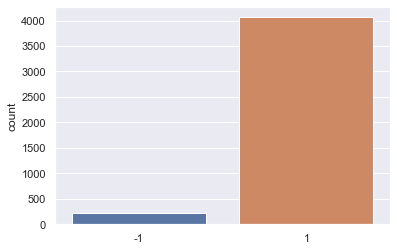

In [126]:
# Predict the Anomalies
labels_anom = lof.fit_predict(X)

# Summary of the Anomaly Labels
sb.countplot(labels_anom)

In [127]:
df2 = pd.DataFrame(data=labels_anom, columns=['isanom'])
print("Number of Anomalies: ",(df2['isanom']==-1).sum())
print("Number of Non-Anomalies: ",(df2['isanom']==1).sum())
print("Total: ",(df2['isanom']==-1).count())

Number of Anomalies:  214
Number of Non-Anomalies:  4065
Total:  4279


## B. DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (`DBSCAN`) is good for clustering data based on proximity, creating clusters of similar density. In DBSCAN, clustering is based on the minimum number of points in the neighbourhood. We will reduce the dimensions of the `horizontal_stack` data into 2-dimensions using __Principal Component Analysis__ `PCA`.

__PCA__ is a technique used to simplify data for exploration, emphasising variation and bring out obvious patterns in the data.

(Back to [clustering](#3.-Clustering))

In [128]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

X = horizontal_stack
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

### Reducing dimensionality of data via PCA

In [129]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         P1        P2
0  0.097218  0.042625
1 -0.024408 -0.009574
2 -0.028429 -0.039150
3 -0.014398 -0.017258
4  0.062930  0.045960


### Building cluster model and obtaining number of clusters

In [130]:
coords = vidData.as_matrix(columns=['lat', 'lon'])

/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [131]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 
num_clusters=len(set(labels))
clusters=pd.Series([coords[labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 8


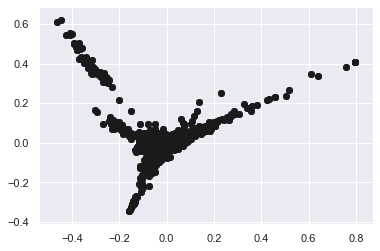

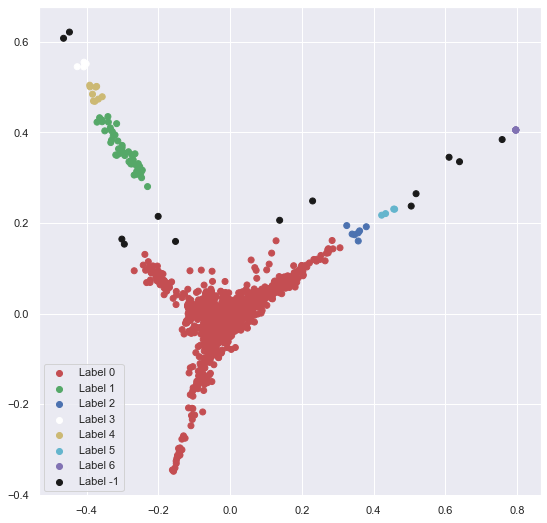

In [132]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'w'
colours[4] = 'y'
colours[5] = 'c'
colours[6] = 'm'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
w = plt.scatter(X_principal['P1'], X_principal['P2'], color ='w');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='c');
m = plt.scatter(X_principal['P1'], X_principal['P2'], color ='m');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, w, y, c, m, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4','Label 5','Label 6','Label -1')) 
  
plt.show() 

#### Observations

From the scatterplot, we observed that there is one major cluster (red) with 5 other distinct clusters. The anomalies are the points in black.

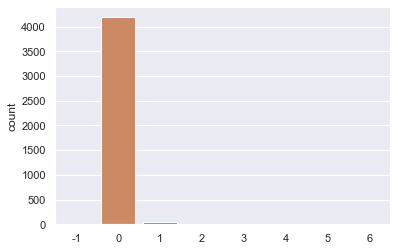

In [133]:
# Summary of the Cluster Labels
sb.countplot(labels)

In [134]:
# creating DBSCAN dataframe 
dbscan_df = pd.DataFrame(data=labels, columns=['dbscan'])

# printing exact total numbers of data points in each cluster
print("cluster -1: ",(dbscan_df['dbscan']==-1).sum())
print("cluster 0: ",(dbscan_df['dbscan']==0).sum())
print("cluster 1: ",(dbscan_df['dbscan']==1).sum())
print("cluster 2: ",(dbscan_df['dbscan']==2).sum())
print("cluster 3: ",(dbscan_df['dbscan']==3).sum())
print("cluster 4: ",(dbscan_df['dbscan']==4).sum())
print("cluster 5: ",(dbscan_df['dbscan']==5).sum())
print("cluster 6: ",(dbscan_df['dbscan']==6).sum())

cluster -1:  13
cluster 0:  4189
cluster 1:  47
cluster 2:  7
cluster 3:  4
cluster 4:  9
cluster 5:  4
cluster 6:  6


### Adding DBSCAN dataframe into vidData dataframe

In [135]:
#adding dataframe into our main vidData dataframe
vidData['dbscan_cluster']=dbscan_df['dbscan']
vidData.head()

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,Above100KViews,TotalLikesDislikes,title_length,title_wordcount,CAPS,symbols,publishDay,publishMonth,kmeans_cluster,dbscan_cluster
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,1,104293,34,7,28,0,0,11,2,0
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,1,162758,62,10,11,3,0,11,2,0
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,1,194581,53,10,8,3,0,12,2,0
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,1,18115,32,5,4,2,0,11,2,0
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,1,155811,24,5,12,3,0,12,2,0


### Silhouette Score for DBSCAN Clustering

In [136]:
silhouette_score_DBSCAN = metrics.silhouette_score(X_principal, labels, metric='euclidean')
print ("Silhouette_score: ",silhouette_score_DBSCAN)

Silhouette_score:  0.8050229268062379


## C. Hierarchical Agglomerative Clustering

Hierarchical Clustering is the hierarchical decomposition of the data based on similar characteristics of the groups, and from this, we can see the relationship between the different sub-clusters and the distance between the data points. Hierarchical clustering is also good for clustering high-dimensional datasets. The results of hierarchical clustering will be presented in a `dendrogram`.

There are two types of hierarchical clustering:
- `Agglomerative` : data points are clustered using a bottom-up approach starting with individual data points, and then merging to form a larger cluster
- `Divisive`: top-down approach where all the data points are treated as one big cluster first before clustering into several small clusters by dividing the one big cluster

For our case, we have chosen to use the __Agglomerative clustering__ approach.

We compressed our multi-dimensional sparse matrix into 2-dimensional for better clustering as dimension reduction eliminates noisy data dimensions and thus and improves accuracy in classification and clustering.

(Back to [clustering](#3.-Clustering))

In [137]:
# Compressing sparse matrix into 2D
svdT = TruncatedSVD(n_components=2)
svdTfit = svdT.fit_transform(horizontal_stack)
X=svdTfit

In [138]:
from sklearn.preprocessing import normalize
data_scaled = normalize(horizontal_stack)
data_scaled = pd.DataFrame(data_scaled, columns=horizontal_stack.columns)
data_scaled.head()

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,jay,children,played,crisi,louis,planes,jersey,planet,jerry,crime
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.158114,0.0,0.0,0.000000,0.0,0.0,0.158114,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.089087,0.0,0.0,0.178174,0.089087,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.377964,0.0,0.0,0.000000,0.377964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dendrograms

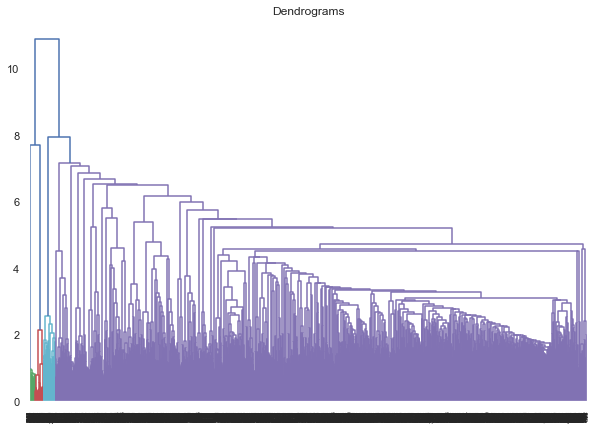

In [139]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

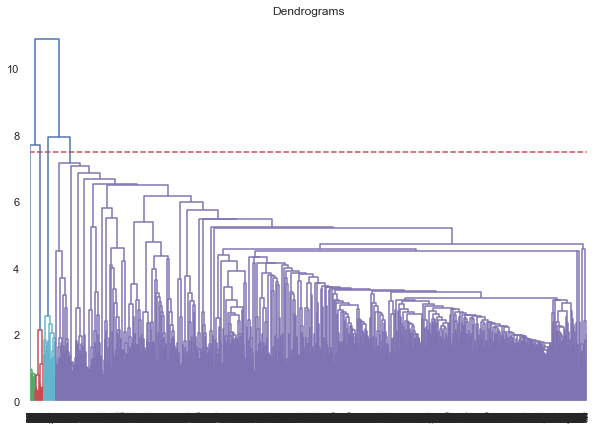

In [140]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=7.5, color='r', linestyle='--')

#### Observations

For this dendrogram, the longest distance without a horizontal line would be at `y=9` and giving us 2 clusters, so we thought that it was not a good cluster size. Hence, we chose the next longest distance without a horizontal line at `y=7.5` and the threshold line (the red horizontal line) cuts 4 of the dendrogram branches, generating 4 clusters. Thus, we set `n_clusters` to 4.

In [141]:
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

### Scatterplot for visualising clusters

Here, we can see 4 distinct clusters from the scatterplot.

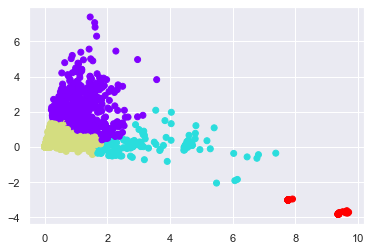

In [142]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

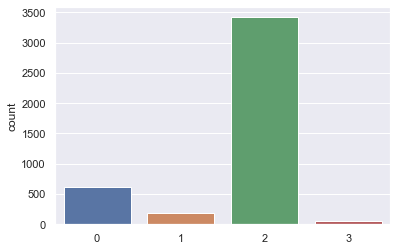

In [143]:
# Summary of the Cluster Labels
sb.countplot(cluster.labels_)

In [144]:
#converting kmeans cluster data into a dataframe
agg_df = pd.DataFrame(data=cluster.labels_, columns=['agg_df'])

#adding dataframe into our main vidData dataframe
vidData['agg_cluster']=agg_df['agg_df']
vidData.head()

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,TotalLikesDislikes,title_length,title_wordcount,CAPS,symbols,publishDay,publishMonth,kmeans_cluster,dbscan_cluster,agg_cluster
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,104293,34,7,28,0,0,11,2,0,2
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,162758,62,10,11,3,0,11,2,0,2
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,194581,53,10,8,3,0,12,2,0,2
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,18115,32,5,4,2,0,11,2,0,0
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,155811,24,5,12,3,0,12,2,0,2


### Silhouette Score for Agglomerative Clustering

In [145]:
silhouette_score_agg = metrics.silhouette_score(X, cluster.labels_, metric='euclidean')
print ("Silhouette_score: ",silhouette_score_agg)

Silhouette_score:  0.6552953414993455


## D. Manual Clustering based on categories

We will be manually clustering the given categories based on our own human judgement, whether the categories are related or similar to each other. We are doing the manual clustering as a __'control'__ clustering, to compare the accuracy of various clustering algorithms to what we deem as clusters. If the other clustering algorithms are not very accurate, we will use the manual clustering as the predictor instead.

Clusters: 
1. Education/Howto/Science&Tech/Auto&Vehicles
2. Sports/Gaming
3. People&blogs/Travels&Events/Pets&Animals/Entertainment
4. News&Politics/Non-profit&Activism
5. Music/Shows/Film&Animation/Comedy

However, we feel that `entertainment` is a very broad category consisting of a lot of sub-categories, but looking at the contents of the videos in the `entertainment` category, we decided to merge it into `cluster 3` due to similarity of content.

(Back to [clustering](#3.-Clustering))

In [146]:
vidData['cluster']=vidData['category_id']

## For reference:
# 1: Film & Animation
# 2: Auto & Vehicles
# 10: Music
# 15: Pets & Animals
# 17: Sports
# 19: Travel & Events
# 20: Gaming
# 22: People & Blogs
# 23: Comedy
# 24: Entertainment
# 25: News & Politics
# 26: How to
# 27: Education
# 28: Science & Tech
# 29: Non-profit and Activism
# 43: Shows

#cluster 1
vidData.loc[vidData['category_id']==2,'cluster']=1
vidData.loc[vidData['category_id']==26,'cluster']=1
vidData.loc[vidData['category_id']==27,'cluster']=1
vidData.loc[vidData['category_id']==28,'cluster']=1

#cluster 2
vidData.loc[vidData['category_id']==17,'cluster']=2
vidData.loc[vidData['category_id']==20,'cluster']=2

#cluster 3
vidData.loc[vidData['category_id']==15,'cluster']=3
vidData.loc[vidData['category_id']==19,'cluster']=3
vidData.loc[vidData['category_id']==22,'cluster']=3
vidData.loc[vidData['category_id']==24,'cluster']=3

#cluster 4
vidData.loc[vidData['category_id']==25,'cluster']=4
vidData.loc[vidData['category_id']==29,'cluster']=4

#cluster 5
vidData.loc[vidData['category_id']==1,'cluster']=5
vidData.loc[vidData['category_id']==10,'cluster']=5
vidData.loc[vidData['category_id']==23,'cluster']=5
vidData.loc[vidData['category_id']==43,'cluster']=5

vidData

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,title_length,title_wordcount,CAPS,symbols,publishDay,publishMonth,kmeans_cluster,dbscan_cluster,agg_cluster,cluster
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,34,7,28,0,0,11,2,0,2,3
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,62,10,11,3,0,11,2,0,2,3
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,53,10,8,3,0,12,2,0,2,5
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,32,5,4,2,0,11,2,0,0,3
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,24,5,12,3,0,12,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,4542,CvkOWb1U-LI,4543,5/3/18,2/3/18,19,28,Science & Tech,Techquickie,230223,...,37,7,7,1,5,2,2,0,2,1
4275,4543,_CFJ1u-DIBc,4544,5/3/18,2/3/18,19,28,Science & Tech,Tech Insider,128591,...,30,5,5,1,5,2,2,0,2,1
4276,4544,Juad74hE6rs,4545,5/3/18,1/3/18,16,26,How to,Gemma Stafford,55076,...,84,11,10,2,2,1,2,0,2,1
4277,4545,n_S8d_1KVhU,4546,5/3/18,1/3/18,18,20,Gaming,Scott Manley,48505,...,83,14,13,4,2,1,2,0,2,2


Number of Category Types : 5
3    1493
5    1122
1     907
4     417
2     340
Name: cluster, dtype: int64


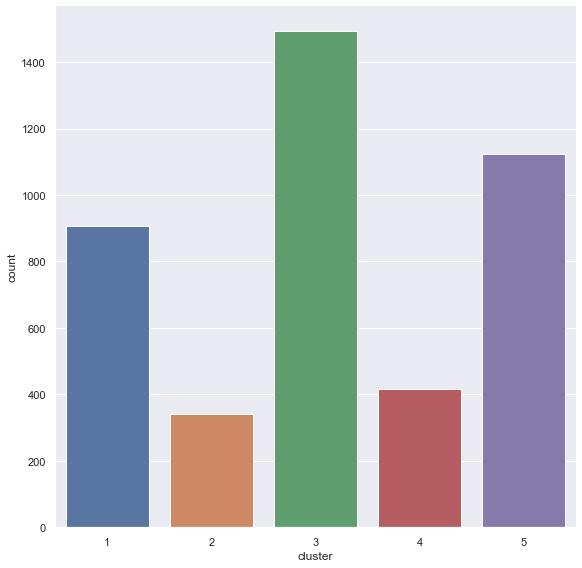

In [147]:
# Primary Types in the Dataset
print("Number of Category Types :", len(vidData["cluster"].unique()))

# vids of each categ Type
print(vidData["cluster"].value_counts())
sb.catplot(x = "cluster", data = vidData, kind = "count", height = 8)

### Calculating the probability of a video in each cluster surpassing 100K Views

In [148]:
def prob_above100k(cluster_num):
    cluster_select = (vidData[vidData['cluster']==cluster_num])
    cluster_above100k = (cluster_select['Above100KViews']==1).sum()
    total = len(cluster_select)
    prob = cluster_above100k/total
    return prob

In [149]:
prob1 = prob_above100k(1)
prob2 = prob_above100k(2)
prob3 = prob_above100k(3)
prob4 = prob_above100k(4)
prob5 = prob_above100k(5)

In [150]:
probData = [prob1, prob2, prob3, prob4, prob5]
P_above100k = pd.DataFrame(probData, columns=['probability above 100k'],
                           index= ["cluster 1","cluster 2", "cluster 3" ,"cluster 4", "cluster 5"])
P_above100k

,probability above 100k
cluster 1,0.734289
cluster 2,0.767647
cluster 3,0.763563
cluster 4,0.517986
cluster 5,0.803922


#### Observations

Cluster 5 (Music/Shows/Film&Animation/Comedy) is the most popular cluster with the highest probability of the videos in this cluster surpassing >100,000 views, and cluster 4 (News&Politics/Non-profit&Activism) being the least popular cluster.

# Evaluating Clustering Algorithms
We will be evaluating the performance of our 4 clustering algorithms using the following:
1. Silhouette Scores
2. Purity Scores
3. Decision Tree Classification Accuracies
4. Random Forest Classification Accuracies (combination of cluster algorithms)

Based on the evaluation, we will then determine which clustering algorithm will best suit our model and be used to support our features for prediction.

(Back to [clustering](#3.-Clustering))

### 1. Silhouette Scores for the Clustering Algorithms
Silhouette coefficients near +1 means that the sample is far away from the neighboring clusters, indicating that there are more distinct clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters, perhaps overlapping and negative values indicate that those samples might have been assigned to the wrong cluster.

In [153]:
silhouette_summary = [silhouette_score_Kmeans, silhouette_score_DBSCAN, silhouette_score_agg]
silhouette_summary_df = pd.DataFrame(silhouette_summary, columns=['Silhouette Scores'],
                           index= ["K-Means","DBSCAN", "Agglomerative"])
silhouette_summary_df

,Silhouette Scores
K-Means,0.686919
DBSCAN,0.805023
Agglomerative,0.655295


#### Observations

Comparing the different clustering algorithms, we can see that DBSCAN has the highest silhouette coefficient and thus might be the most accurate clustering algorithm for our model.

### 2. Purity Scores
To compute purity, each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by the total number of datapoints in each cluster.

In [154]:
def purity_score(y_true, y_pred):
    """Purity score
        Args:
            y_true(np.ndarray): n*1 matrix Ground truth labels
            y_pred(np.ndarray): n*1 matrix Predicted clusters

        Returns:
            float: Purity score
    """
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [155]:
purity_kmeans=purity_score(vidData['cluster'],vidData['kmeans_cluster'])
purity_dbscan=purity_score(vidData['cluster'],vidData['dbscan_cluster'])
purity_agg=purity_score(vidData['cluster'],vidData['agg_cluster'])
purity_manual=purity_score(vidData['category_id'],vidData['cluster'])

purity_summary = [purity_kmeans, purity_dbscan, purity_agg,purity_manual]
purity_summary_df = pd.DataFrame(purity_summary, columns=['Purity Scores'],
                           index= ["K-Means","DBSCAN", "Agglomerative", "Manual"])
purity_summary_df

,Purity Scores
K-Means,0.349848
DBSCAN,0.350315
Agglomerative,0.358028
Manual,0.629820


#### Observations

The purity scores tells us that the `K-Means`, `DBSCAN` and `Hierarchical` algorithms form clusters that are not very pure and distinct, thus indicating that the clustering may not have worked very well. Our manual clustering method still remains as the best clustering method with the highest purity score.

### 3. Calculating the classification accuracies of clustering methods using Decision Tree Classifier

This is to see the classification accuracies of each individual clustering algorithms.

We have renamed our clustering methods using the letters below, and then assess their classification accuracies of using combinations of cluster algorithms using random forest.

- A: `'kmeans_cluster'`
- B: `'dbscan_cluster'`
- C: `'agg_cluster'`

In [156]:
A = 'kmeans_cluster'
B = 'dbscan_cluster'
C = 'agg_cluster'
D = 'cluster'

A=summary_dectree(vidData[[A]],'KMeans')
B=summary_dectree(vidData[[B]],'DBSCAN')
C=summary_dectree(vidData[[C]],'Agglomerative')
D=summary_dectree(vidData[[D]],'Manual')

frames_indiv_cluster =[A,B,C,D]
results_indiv_cluster = pd.concat(frames_indiv_cluster)
results_indiv_cluster

,Classification accuracy of train,Classification accuracy of test
KMeans,0.745092,0.742056
DBSCAN,0.748520,0.731776
Agglomerative,0.747273,0.735514
Manual,0.744469,0.743925


#### Observations

All our clustering algorithms have similar classification accuracies, so we decided to do further analysis on the classification accuracies using `Random Forest`.

### 4. Calculating the classification accuracies of the combinations of clustering methods using Random Forest

This is to see which clustering algorithms help to increase the accuracy of our prediction model, whether the video will surpass 100,000 views as some clustering methods may not be the most appropriate for our data, bringing down the classification accuracy. 

### Random Forest Decision Model Function

In [157]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
    
def summary(z,index): #z is predictor name
    #spliting data into 75% test and 25% into train which is by default
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(z), pd.DataFrame(vidData['Above100KViews']), test_size = 0.25, random_state=0)

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                     max_depth = 5)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(x_train, y_train.values.ravel())

    # Predict views corresponding to predictors
    y_train_pred = rforest.predict(x_train)
    y_test_pred = rforest.predict(x_test)

    a = rforest.score(x_train, y_train)
    b = rforest.score(x_test, y_test)
    data=[[a,b]]
    df = pd.DataFrame(data, columns = ['Classification accuracy of train','Classification accuracy of test'], index=[index])
    return df
    

In [158]:
A= 'kmeans_cluster'
B= 'dbscan_cluster'
C= 'agg_cluster'
D= 'cluster'

AB=summary(vidData[[A,B]],'AB')
ABC=summary(vidData[[A,B,C]],'ABC')
ABCD=summary(vidData[[A,B,C,D]],'ABCD')

frames_clust=[AB,ABC,ABCD]
results_clust = pd.concat(frames_clust)
results_clust

,Classification accuracy of train,Classification accuracy of test
AB,0.742911,0.748598
ABC,0.742911,0.748598
ABCD,0.749455,0.757944


#### Observations
The classification accuracies of the multi-variate classifications containing `K-Means + DBSCAN` did not improve upon adding `Hierarchical` clustering algorithms, but only did improve when `Manual Clustering` was added. 


## Summary: Manual Clustering chosen
Since only manual clustering `cluster` brought up the classification accuracy of the multi-variate classification via random forest, __we will be using our manual clustering results for our prediction models__. Furthermore, the clustering algorithms produce results that may not be intuitive and interpretable by users, while manual clustering allows for better comprehension.

# 4. Incorporating all features

In this section, we want to make a dataframe with all the final features we will be using in our prediction. We will decide whether to use each predictor analysed above based on the combined classification accuracy with other predictors.

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Predictive Models](#5.-Predictive-Models))

### Calculating the classification accuracies of the combinations of predictors using Random Forest

This is to see which predictors are actually helpful in our prediction model, to determine whether the video will surpass 100,000 views, as some predictors may be irrelevant and brings down the classification accuracy. From this, we will filter out the predictors which we will use in our final prediction model. 

For simplicity, we have renamed our predictors using the letters below, and then creating a combination of predictor variables (eg. `TotalLikesDislikes` + `trend_day_count` = ab) and assess their classification accuracies using random forest.

- a: `'TotalLikesDislikes'`
- b: `'trend_day_count'`
- c: `'trend.publish.diff'`
- d: `'subscriber'`
- e: `'comment_count'`
- f: `'tags_count'`
- g: `'tag_appeared_in_title_count'`
- h: `'title_length'`
- i: `'title_wordcount'`
- j: `'CAPS'`
- k: `'symbols'`
- l: `'publishDay'`
- m: `'publishMonth'`

Random Forest function `"summary()"` used is the same as the one used above.

In [161]:
# random forest - combination of predictors classification accuracy

# Numeric Predictors
a='TotalLikesDislikes'
b='trend_day_count'
c='trend.publish.diff'
d='subscriber'
e='comment_count'
f='tags_count'
g='tag_appeared_in_title_count'
h='title_length'
i='title_wordcount'
j='CAPS'
k='symbols'

# TimeFrame Predictors
l='publishDay'
m='publishMonth'

ab=summary(vidData[[a,b]],'ab')
abc=summary(vidData[[a,b,c]],'abc')
abcd=summary(vidData[[a,b,c,d]],'abcd')
abcde=summary(vidData[[a,b,c,d,e]],'abcde')
abcdef=summary(vidData[[a,b,c,d,e,f]],'abcdef')
abcdefg=summary(vidData[[a,b,c,d,e,f,g]],'abcdefg')
abcdefgh=summary(vidData[[a,b,c,d,e,f,g,h]],'abcdefgh')
abcdefghi=summary(vidData[[a,b,c,d,e,f,g,h,i]],'abcdefghi')
abcdefghij=summary(vidData[[a,b,c,d,e,f,g,h,i,j]],'abcdefghij')
abcdefghijk=summary(vidData[[a,b,c,d,e,f,g,h,i,j,k]],'abcdefghijk')
abcdefghijkl=summary(vidData[[a,b,c,d,e,f,g,h,i,j,k,l]],'abcdefghijkl')
abcdefghijklm=summary(vidData[[a,b,c,d,e,f,g,h,i,j,k,l,m]],'abcdefghijklm')

frames=[ab,abc,abcd,abcde,abcdef,abcdefg,abcdefgh,abcdefghi,abcdefghij,abcdefghijk, abcdefghijkl, abcdefghijklm]
results = pd.concat(frames)
results

,Classification accuracy of train,Classification accuracy of test
ab,0.899346,0.873832
abc,0.901839,0.882243
abcd,0.907448,0.885047
abcde,0.916797,0.888785
abcdef,0.916173,0.891589
abcdefg,0.917420,0.889720
abcdefgh,0.915238,0.885981
abcdefghi,0.915238,0.893458
abcdefghij,0.915550,0.893458
abcdefghijk,0.917420,0.889720


### Plotting a line plot of classification accuracies and predictors

This helps to visualise which predictor, upon being added on, will improve the multi-variate classification accuracies and hence help us in filtering out the useful predictors.

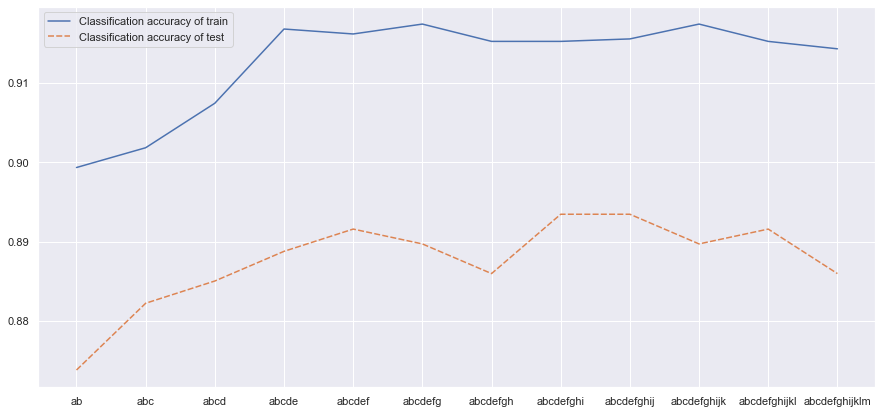

In [162]:
f, axes = plt.subplots(figsize=(15, 7))
ax = sb.lineplot(x=None,y=None,data=results)

### Observations

From this lineplot, we will drop some predictors which we think are irrelevant and also brought down the combined classification accuracies, namely:
- g: `'tag_appeared_in_title_count'`
- h: `'title_length'`
- l: `'publishDay'`
- m: `'publishMonth'`

Despite some other predictors like 'j: `CAPS`' bringing down our classification accuracies, it might still be a useful predictor intuitively.

### Creating a final features dataframe for our prediction model

The final features dataframe will include the top 2000 lemmatized tags `Top2000Tags2` and the top 2000 title words `Top2000TitleWords` as well as our other numeric predictors above.

In [163]:
horizontal_stack.shape

(4279, 4000)

In [164]:
# creating a features dataframe and inserting our horizontal_stack matrix consisting of top 2000 tags and title words
features=horizontal_stack.copy()
features.head()

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,jay,children,played,crisi,louis,planes,jersey,planet,jerry,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# including our predictors
features['TotalLikesDislikes']= vidData['TotalLikesDislikes']
features['TrendDayCount']=vidData['trend_day_count']
features['TrendPublishDiff']= vidData['trend.publish.diff']
features['SubscriberCount']=vidData['subscriber']
features['CommentCount']=vidData['comment_count']
features['TagsCount']=vidData['tags_count']
features['TitleWordCount']=vidData['title_wordcount']
features['Caps']=vidData['CAPS']
features['Symbols']=vidData['symbols']
features

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,crime,TotalLikesDislikes,TrendDayCount,TrendPublishDiff,SubscriberCount,CommentCount,TagsCount,TitleWordCount,Caps,Symbols
0,0,0,0,0,0,0,0,0,0,0,...,0,104293,7,7,9086142.0,22149,1,7,28,0
1,0,0,0,0,0,0,0,0,0,0,...,0,162758,7,7,5937292.0,19820,4,10,11,3
2,1,0,0,0,0,0,1,0,0,0,...,0,194581,7,8,4191209.0,9990,23,10,8,3
3,0,0,0,1,0,0,2,1,0,0,...,0,18115,7,7,13186408.0,2988,28,5,4,2
4,0,0,0,1,0,0,0,1,0,0,...,0,155811,6,7,20563106.0,20573,14,5,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,0,0,0,0,0,0,0,0,0,0,...,0,11372,1,3,1980988.0,791,23,7,7,1
4275,0,0,0,0,0,0,0,0,0,0,...,0,3240,1,3,1420833.0,564,17,5,5,1
4276,0,0,0,0,0,0,0,0,0,0,...,0,3471,1,4,1549469.0,621,24,11,10,2
4277,0,0,0,0,0,0,0,0,0,0,...,0,2521,1,4,692776.0,350,8,14,13,4


In [166]:
features_manual = features.copy()

# including manual clustering
features_manual['manual_cluster'] = vidData['cluster']
features_manual

,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,TotalLikesDislikes,TrendDayCount,TrendPublishDiff,SubscriberCount,CommentCount,TagsCount,TitleWordCount,Caps,Symbols,manual_cluster
0,0,0,0,0,0,0,0,0,0,0,...,104293,7,7,9086142.0,22149,1,7,28,0,3
1,0,0,0,0,0,0,0,0,0,0,...,162758,7,7,5937292.0,19820,4,10,11,3,3
2,1,0,0,0,0,0,1,0,0,0,...,194581,7,8,4191209.0,9990,23,10,8,3,5
3,0,0,0,1,0,0,2,1,0,0,...,18115,7,7,13186408.0,2988,28,5,4,2,3
4,0,0,0,1,0,0,0,1,0,0,...,155811,6,7,20563106.0,20573,14,5,12,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,0,0,0,0,0,0,0,0,0,0,...,11372,1,3,1980988.0,791,23,7,7,1,1
4275,0,0,0,0,0,0,0,0,0,0,...,3240,1,3,1420833.0,564,17,5,5,1,1
4276,0,0,0,0,0,0,0,0,0,0,...,3471,1,4,1549469.0,621,24,11,10,2,1
4277,0,0,0,0,0,0,0,0,0,0,...,2521,1,4,692776.0,350,8,14,13,4,2


In [167]:
#convert to sparse matrix for efficient model training
from scipy.sparse import csr_matrix
features_manual_matrix = csr_matrix(features_manual)
features_manual_matrix.shape

(4279, 4010)

# 5. Predictive Models

Here, we will train our data according to these classifier models and see which model works best for us.

1. [Linear Regression](#1.-Linear-Regression)
2. [Decision Tree Classifier](#2.-Multi-Variate-Decision-Tree-Classifier)
3. [Random Forest](#3.-Random-Forest-Classifier)
4. [Naive Bayes](#4.-Naive-Bayes-Classifier)
5. [Logistic Regression](#5.-Logistic-Regression)
6. [K-Nearest Neighbours](#6.-K-Nearest-Neighbours)
7. [Gradient Boosting](#7.-Gradient-Boosting)

We will do the classification for each model based on `features_manual` matrix we created above and compare the different models. 
(see [Evaluation of Predictive Models](#Evaluation-of-Predictive-Models))

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Overview of Predictions](#6.-Overview-of-Predictions))

In [168]:
Predicted100k = (vidData['Above100KViews'])
Predicted100k.head()

0    1
1    1
2    1
3    1
4    1
Name: Above100KViews, dtype: int64

### Making a function for ROC curve

__Area Under The Curve__ (`AUC`) - __Receiver Operating Characteristics__ (`ROC`) curve is used to evaluate or visualize the performance of the multi-class classification problem at various threshold settings. ROC is a probability curve and AUC is a measure of separability and it tells us how capable a model is at distinguishing between classes. The higher the AUC, the better the separability. 

This AUC-ROC Curve is plotted based on the confusion matrices, where ROC curve is plotted with TPR (y-axis) against the FPR (x-axis). AUC is the overlap between the curves, based on the FPR and FNR. 

- `AUC = 1`: perfect separability
- `AUC = 0.5`: full overlap of positive and negative curves, model is incapable of distinguishing between positive class and negative class


In [169]:
def ROC_CURVE(z):
    y_pred_proba = z.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()
    
def auc_score(z):
    y_pred_proba = z.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    return auc

## 1. Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task and make predictions for a response variable based on __independent predictors__, finding out the relationships between the predictors and response.

(Back to [Predictive Models](#5.-Predictive-Models))

Intercept of Regression 	: b =  -4909647.417172536


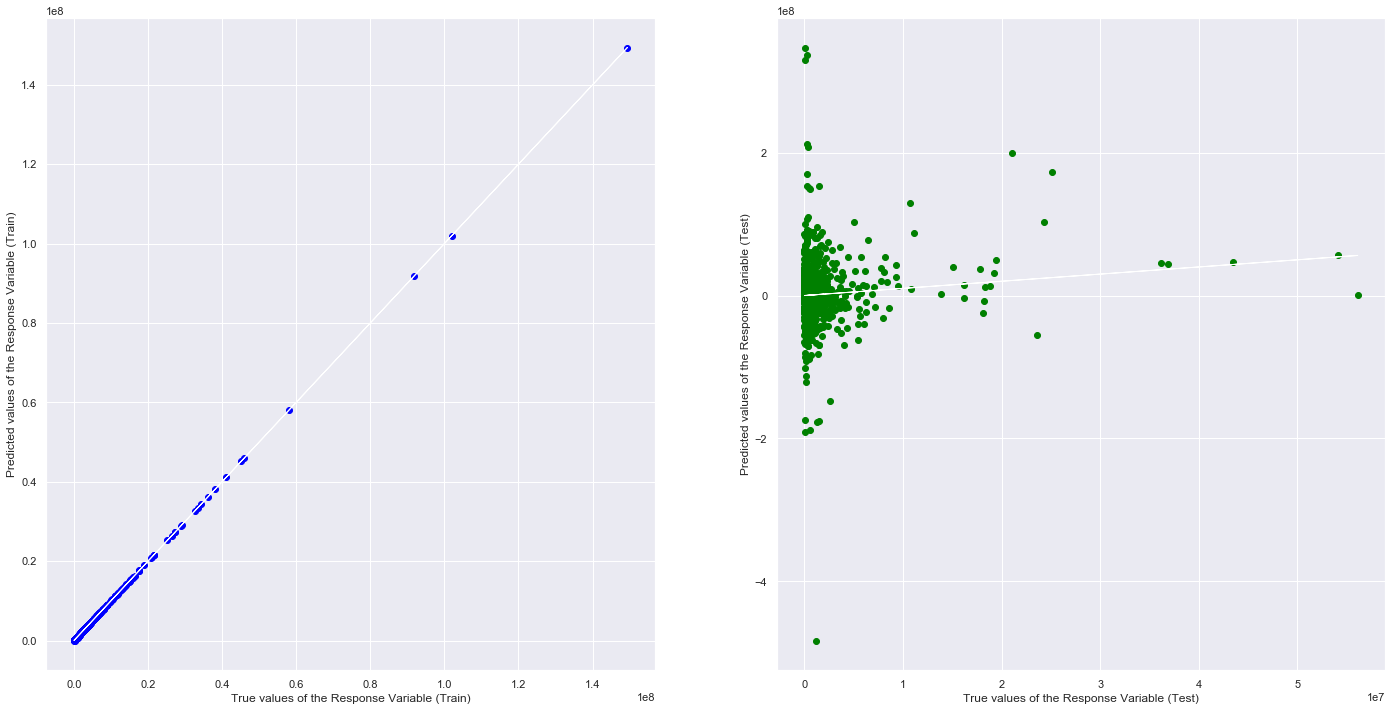

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.999992734128575
Mean Squared Error (MSE) 	: 163911147.63768566

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -115.87799137035147
Mean Squared Error (MSE) 	: 1891985452681771.2



In [170]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = vidData['views']
X = features_manual

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
mse_linreg_train = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse_linreg_train)
print()

# Check the Goodness of Fit (on Test Data)
mse_linreg_test = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse_linreg_test)
print()

### Observations

Explained variance score: 1 is perfect prediction. Since our linear regression model's train set has an Explained Variance of `~1.00` (3.sf) while that of the test set is vastly different, hence our model may be overfitting.

Furthermore, our predictors are not exactly independent from one another, as some predictors may be a causality of one another. Hence, we will not be using __linear regression__ as one of our predictive models.

## 2. Multi-Variate Decision Tree Classifier

A decision tree is a flowchart-like tree structure where it branches into leafnodes depending on decisions, each leafnode representing the outcome. This classifier learns to partition based on attribute value. It is one of the most simplest classification algorithms.

Indicators of significance of a predictor:
- a significant predictor is located higher up in the nodes of the tree
- a significant predictor appears more frequently across the tree

(Back to [Predictive Models](#5.-Predictive-Models))

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import mean_squared_error

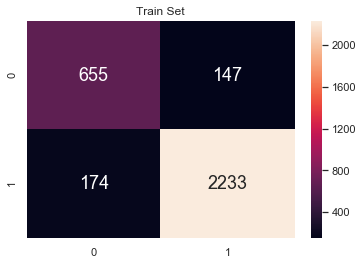

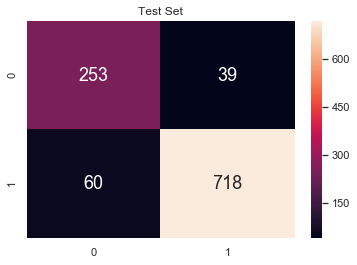

,Train Dataset,Test Dataset
Classification accuracies,0.899969,0.907477
Mean Squared Error (MSE),0.100031,0.092523
True Negative Rate,0.816708,0.866438
True Positive Rate,0.927711,0.922879


In [172]:
#spliting data into 75% test and 25% into train which is by default
X_train, X_test, y_train, y_test = train_test_split(features_manual, pd.DataFrame(vidData['Above100KViews']), test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict response corresponding to predictor
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()

r2_train_dectree = dectree.score(X_train, y_train)
r2_test_dectree = dectree.score(X_test, y_test)
mse_dectree_train = mean_squared_error(y_train, y_train_pred)
mse_dectree_test = mean_squared_error(y_test, y_test_pred)

cm = confusion_matrix(y_train, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]
    
cmt = confusion_matrix(y_test, y_test_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_dectree,r2_test_dectree],[mse_dectree_train, mse_dectree_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                   columns=['Train Dataset','Test Dataset'])
df2

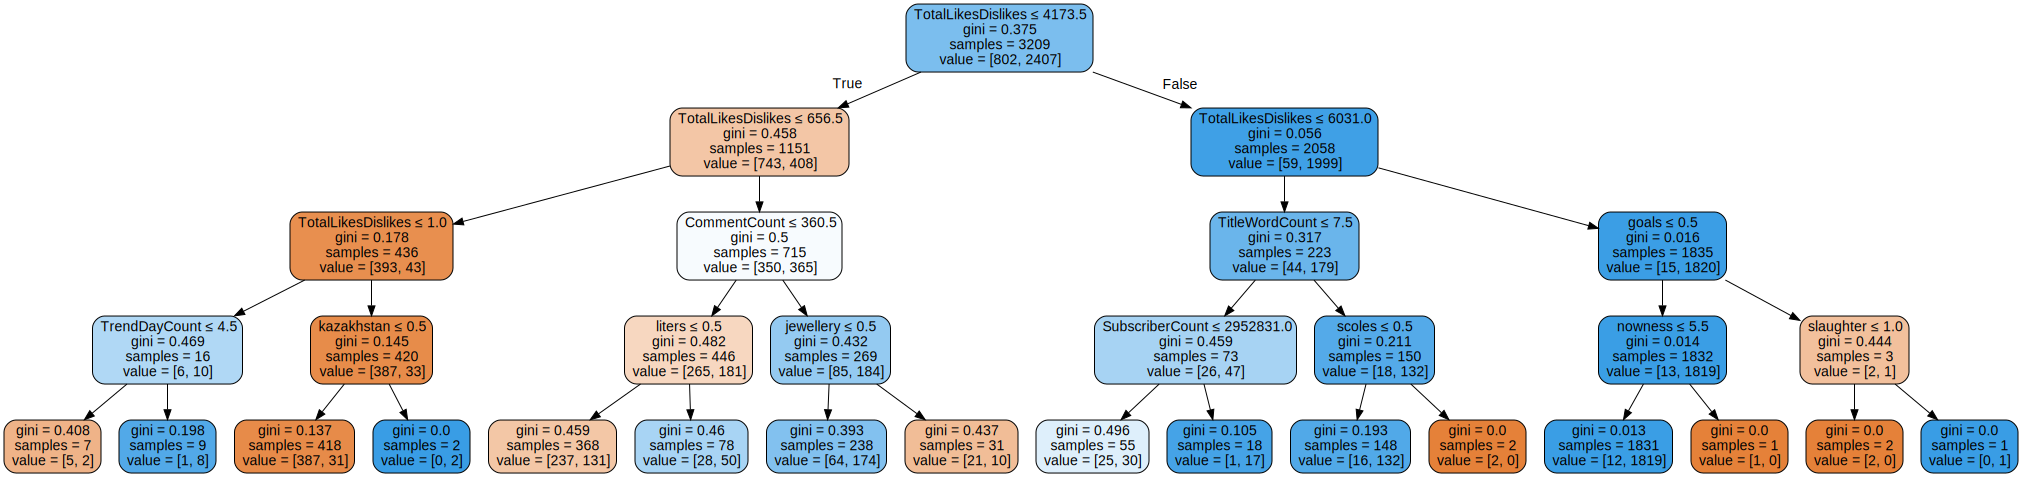

In [173]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                        feature_names = X_train.columns,              # the features 
                        out_file = None,                              # output file
                        filled = True,                                # node colors
                        rounded = True,                               # make pretty
                        special_characters = True)                    # postscript

graphviz.Source(treedot)

### Observations

It can be seen that `TotalLikesDislikes` is one of the most significant predictors as it appears higher up in the tree and that it appears several times across the whole tree. From the model, we can also see that certain words like `show`, `interview` and `nintendo` has a sizeable significance in contributing to the outcome of surpassing 100,000 views.

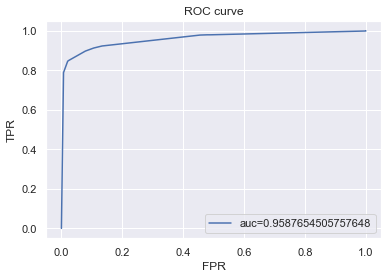

In [174]:
ROC_CURVE(dectree)
auc_dectree = auc_score(dectree)

## 3. Random Forest Classifier

Random Forest is an ensemble of trees that may give us a more accurate result as combinations of decision trees are used.

(Back to [Predictive Models](#5.-Predictive-Models))

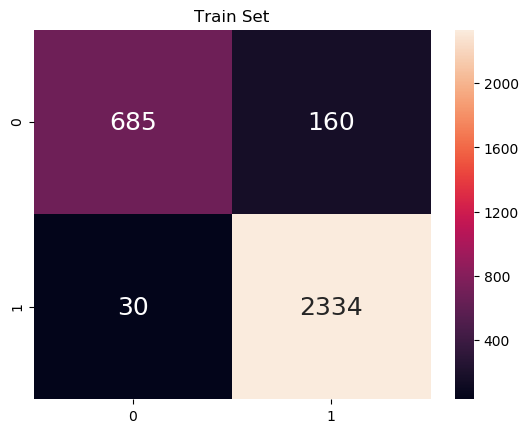

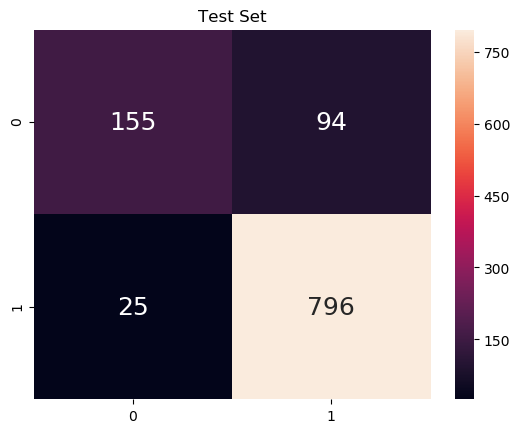

,Train Dataset,Test Dataset
Classification accuracies,0.940792,0.888785
Mean Squared Error (MSE),0.059208,0.111215
True Negative Rate,0.810651,0.622490
True Positive Rate,0.987310,0.969549


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = Predicted100k

#spliting data into 75% test and 25% into train which is by default
X_train, X_test, y_train, y_test = train_test_split(features_manual, pd.DataFrame(y), test_size = 0.25)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators =100,  # n_estimators denote number of trees
                                     max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

# Predict views corresponding to predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)
    
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()
    
r2_train_rforest = rforest.score(X_train, y_train)
r2_test_rforest = rforest.score(X_test, y_test)
mse_rforest_train = mean_squared_error(y_train, y_train_pred)
mse_rforest_test = mean_squared_error(y_test, y_test_pred)
    
cm = confusion_matrix(y_train, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

cmt = confusion_matrix(y_test, y_test_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_rforest,r2_test_rforest],[mse_rforest_train, mse_rforest_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Dataset','Test Dataset'])
df2

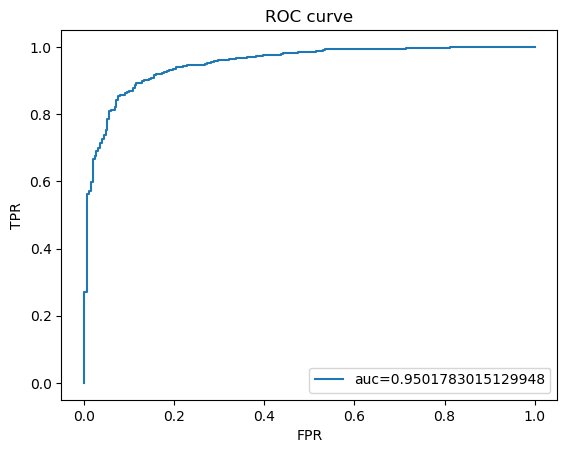

In [204]:
ROC_CURVE(rforest)
auc_rforest = auc_score(rforest)

## 4. Naive Bayes Classifier

Naive Bayes is one of the simplest supervised learning algorithms. It assumes  that the effect of a particular feature in a class is independent of other features and have high accuracy and speed on large datasets.

(Back to [Predictive Models](#5.-Predictive-Models))

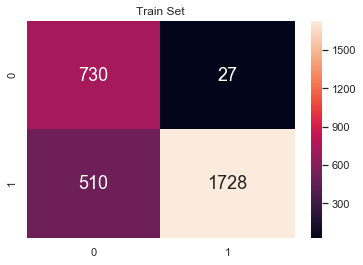

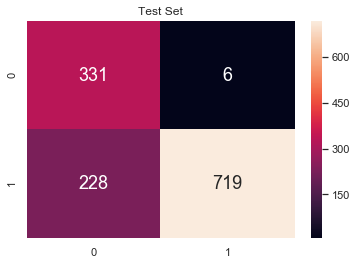

,Train Dataset,Test Dataset
Classification accuracies,0.820701,0.817757
Mean Squared Error (MSE),0.179299,0.182243
True Negative Rate,0.964333,0.982196
True Positive Rate,0.772118,0.759240


In [177]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_manual, Predicted100k, test_size=0.3,random_state=42)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict views corresponding to predictors
y_train_pred =gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()

r2_train_gnb = gnb.score(X_train, y_train)
r2_test_gnb = gnb.score(X_test, y_test)
mse_gnb_train = mean_squared_error(y_train, y_train_pred)
mse_gnb_test = mean_squared_error(y_test, y_test_pred)
    
cm = confusion_matrix(y_train, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

cmt = confusion_matrix(y_test, y_test_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_gnb,r2_test_gnb],[mse_gnb_train, mse_gnb_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Dataset','Test Dataset'])
df2

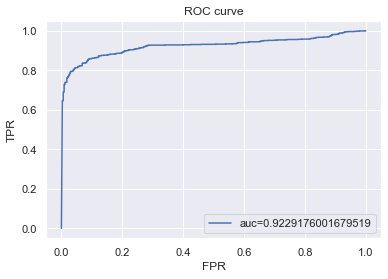

In [178]:
ROC_CURVE(gnb)
auc_gnb = auc_score(gnb)

### Comments

One key flaw with the Naive Bayes Classifier is that it assumes that all predictors are independent with each other, which is untrue, especially in our case as predictors such as `TotalLikesDislikes`, `SubscriberCount`, `TrenddayCount` and `CommentCount` which may be a cause and effect of each other and are related in some way.

## 5. Logistic Regression

Logistic Regression is great for multiclass classification where there are one or more independent variables in determining the outcome. The objective of logistic regression is to find relationship between the set of predictors and the response.

(Back to [Predictive Models](#5.-Predictive-Models))

/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


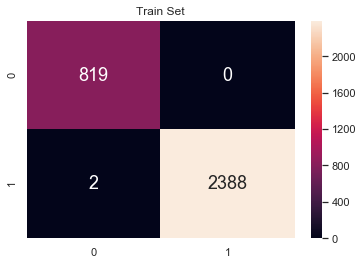

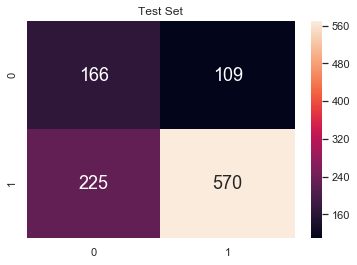

,Train Dataset,Test Dataset
Classification accuracies,0.999377,0.687850
Mean Squared Error (MSE),0.000623,0.312150
True Negative Rate,1.000000,0.603636
True Positive Rate,0.999163,0.716981


In [179]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = Predicted100k
X = features_manual
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)

# Predict views corresponding to predictors
y_train_pred =logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()

r2_train_logreg = logreg.score(X_train, y_train)
r2_test_logreg = logreg.score(X_test, y_test)
mse_logreg_train = mean_squared_error(y_train, y_train_pred)
mse_logreg_test = mean_squared_error(y_test, y_test_pred)
    
cm = confusion_matrix(y_train, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

cmt = confusion_matrix(y_test, y_test_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_logreg,r2_test_logreg],[mse_logreg_train, mse_logreg_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Dataset','Test Dataset'])
df2

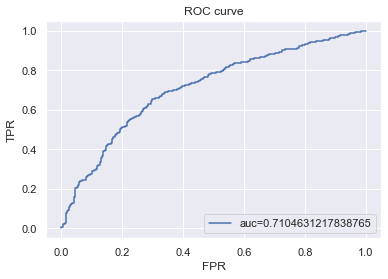

In [180]:
ROC_CURVE(logreg)
auc_logreg = auc_score(logreg)

## 6. K-Nearest Neighbours
The K-nearest neighbors (KNN) algorithm is an easy and simple supervised machine learning algorithm that can be used to classify and predict, assuming that similar things exist in close proximity. In other words, similar things are near to each other.

(Back to [Predictive Models](#5.-Predictive-Models))

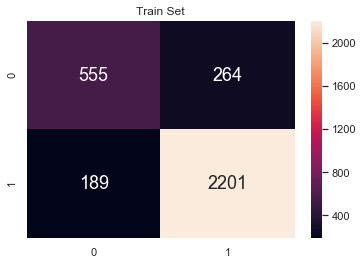

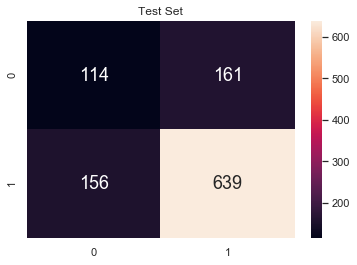

,Train Dataset,Test Dataset
Classification accuracies,0.858835,0.703738
Mean Squared Error (MSE),0.141165,0.296262
True Negative Rate,0.677656,0.414545
True Positive Rate,0.920921,0.803774


In [181]:
from sklearn.neighbors import KNeighborsClassifier
y = Predicted100k
X = features_manual
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)

# Predict views corresponding to predictors
y_train_pred =knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()

r2_train_knn = knn.score(X_train, y_train)
r2_test_knn = knn.score(X_test, y_test)
mse_knn_train = mean_squared_error(y_train, y_train_pred)
mse_knn_test = mean_squared_error(y_test, y_test_pred)
    
cm = confusion_matrix(y_train, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

cmt = confusion_matrix(y_test, y_test_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_knn,r2_test_knn],[mse_knn_train, mse_knn_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Dataset','Test Dataset'])
df2

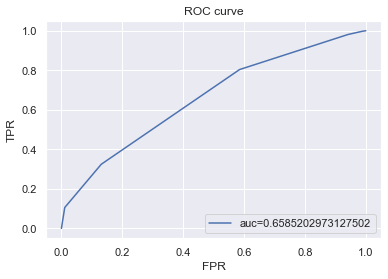

In [182]:
ROC_CURVE(knn)
auc_knn = auc_score(knn)

## 7. Gradient Boosting
Boosting is a method of converting weak learners into strong learners by using an ensemble of decision trees. In boosting, each new tree is a fit on a modified version of the original data set, starting by training a decision tree and assign an equal weight to each outcome. Then, we increment the weights of difficult classifications and lower the weights of easily classified observations, with the second tree fitted on this weighted data. Thus, predictions of the final ensemble model is the weighted sum of the predictions made by the previous tree models.

### Training Gradient Boosting Classifier
Gradient boosting involves 3 elements:
1. a loss function to be optimized
2. a weak learner to make predictions
3. an additive model to add weak learners to minimise the loss function

(Back to [Predictive Models](#5.-Predictive-Models))

In [183]:
# transform data
from sklearn.preprocessing import MinMaxScaler

y = Predicted100k
X = features_manual
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

### Learning Rate

Slow learning is better for gradient boosting, optimally with a learning rate of 0.5.

In [184]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.740
Accuracy score (validation): 0.758

Learning rate:  0.1
Accuracy score (training): 0.740
Accuracy score (validation): 0.758

Learning rate:  0.25
Accuracy score (training): 0.740
Accuracy score (validation): 0.758

Learning rate:  0.5
Accuracy score (training): 0.749
Accuracy score (validation): 0.760

Learning rate:  0.75
Accuracy score (training): 0.749
Accuracy score (validation): 0.758

Learning rate:  1
Accuracy score (training): 0.749
Accuracy score (validation): 0.751



#### Observations

The accuracy score when learning rate is `0.5` is the highest, therefore we will be training the algorithm with a learning rate of `0.5`.

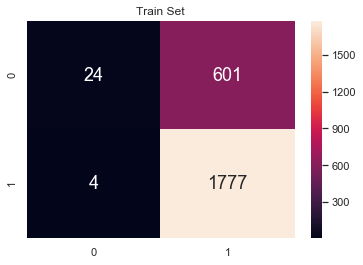

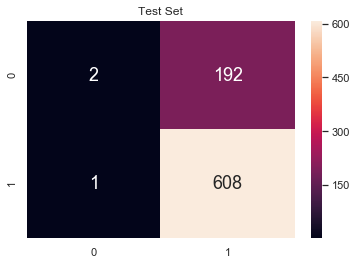

,Train Sub Dataset,Validation Sub Dataset
Classification accuracies,0.748545,1.000000
Mean Squared Error (MSE),0.251455,0.240349
True Negative Rate,0.038400,0.010309
True Positive Rate,0.997754,0.998358


In [185]:
#training GB model
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)

# Predict views corresponding to predictors
y_train_pred =gb.predict(X_train_sub)
y_validation_pred = gb.predict(X_validation_sub)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_train_sub, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Train Set')
plt.show()
    
f, axes = plt.subplots()
sb.heatmap(confusion_matrix(y_validation_sub, y_validation_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
bot, top = plt.ylim() # discover the values for bottom and top
bot += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bot, top) # update the ylim(bottom, top) values
plt.title('Test Set')
plt.show()

r2_train_gb = gb.score(X_train_sub, y_train_sub)
r2_test_gb = gb.score(X_validation_sub, y_validation_pred)
mse_gb_train = mean_squared_error(y_train_sub, y_train_pred)
mse_gb_test = mean_squared_error(y_validation_sub, y_validation_pred)
    
cm = confusion_matrix(y_train_sub, y_train_pred)
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

cmt = confusion_matrix(y_validation_sub, y_validation_pred)
e=cmt[0][0]
f=cmt[0][1]
g=cmt[1][0]
h=cmt[1][1]

trueNegativeRate=[(a)/((a)+(b)),(e)/((e)+(f))]
truePositiveRate=[(d)/((d)+(c)),(h)/((h)+(g))]

data2=[[r2_train_gb,r2_test_gb],[mse_gb_train, mse_gb_test],trueNegativeRate, truePositiveRate]
df2 = pd.DataFrame(data2, index = ['Classification accuracies', 'Mean Squared Error (MSE)', 'True Negative Rate', 'True Positive Rate'], 
                       columns=['Train Sub Dataset','Validation Sub Dataset'])
df2

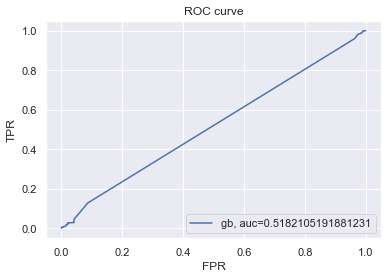

In [186]:
y_pred_proba = gb.predict_proba(X_validation_sub)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_validation_sub,  y_pred_proba)
auc = metrics.roc_auc_score(y_validation_sub, y_pred_proba)
plt.plot(fpr,tpr,label="gb, auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()
auc_gb = auc

# Evaluation of Predictive Models

The predictive models are evaluated based on:
1. __Area Under the Curve__ `AUC` Scores
2. __Mean-Squared Errors__ `MSE` Scores
3. __Classification Accuracies__ of Train and Test data

(Back to [Predictive Models](#5.-Predictive-Models))

### Statistical Summary of Predictive Models
Here, we plot horizontal barplots for easy visual comparison between the various models.

In [205]:
#create dataframe
data = [[mse_dectree_test,auc_dectree,r2_train_dectree,r2_test_dectree],
        [mse_rforest_test,auc_rforest,r2_train_rforest,r2_test_rforest],
        [mse_gnb_test,auc_gnb,r2_train_gnb,r2_test_gnb],
        [mse_logreg_test,auc_logreg,r2_train_logreg,r2_test_logreg],
        [mse_knn_test,auc_knn,r2_train_knn,r2_test_knn],
        [mse_gb_test,auc_gb,r2_train_gb,r2_test_gb]]
summarydf = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression','K-Nearest Neighbours', 'Gradient Boosting'], 
                          columns=['MSE Scores','AUC Scores','Classification Accuracy Train','Classification Accuracy Test'])
summarydf

,MSE Scores,AUC Scores,Classification Accuracy Train,Classification Accuracy Test
Decision Tree,0.092523,0.958765,0.899969,0.907477
Random Forest,0.111215,0.950178,0.940792,0.888785
Naive Bayes,0.182243,0.922918,0.820701,0.817757
Logistic Regression,0.312150,0.710463,0.999377,0.687850
K-Nearest Neighbours,0.296262,0.658520,0.858835,0.703738
Gradient Boosting,0.240349,0.518211,0.748545,1.000000


### Comparison of AUC

Text(0.5, 0, 'AUC Scores')

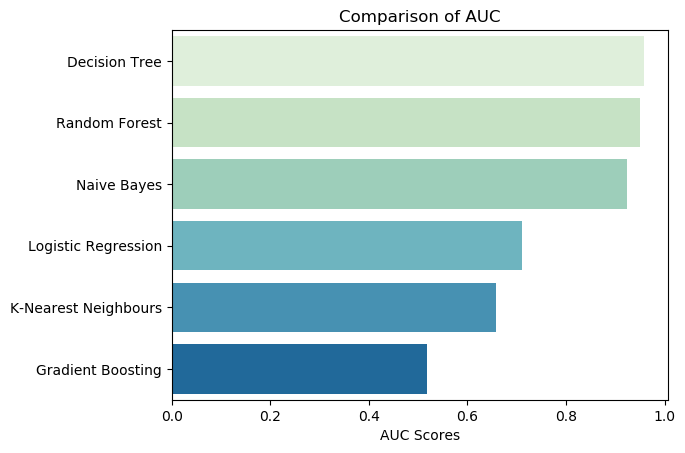

In [206]:
fig, ax = plt.subplots()
auc_scores = (auc_dectree,auc_rforest,auc_gnb,auc_logreg,auc_knn,auc_gb)

sb.barplot(data=summarydf,x=auc_scores, 
           y=['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression','K-Nearest Neighbours', 
              'Gradient Boosting'], palette=("GnBu"))
plt.title("Comparison of AUC")
plt.xlabel("AUC Scores")

### Comparison of MSE

Text(0.5, 0, 'MSE Scores')

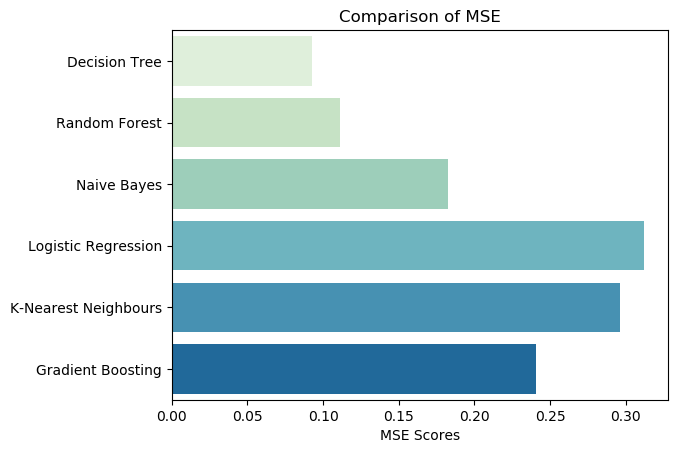

In [207]:
fig, ax = plt.subplots()

mse_scores = (mse_dectree_test,mse_rforest_test,mse_gnb_test,mse_logreg_test,mse_knn_test,mse_gb_test)
sb.barplot(data=summarydf,x=mse_scores, 
           y=['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression','K-Nearest Neighbours', 
              'Gradient Boosting'], palette=("GnBu"))
plt.title("Comparison of MSE")
plt.xlabel("MSE Scores")

### Comparison of Classification Accuracies (Test)

Text(0.5, 0, 'Classification Accuracy (Test) Scores')

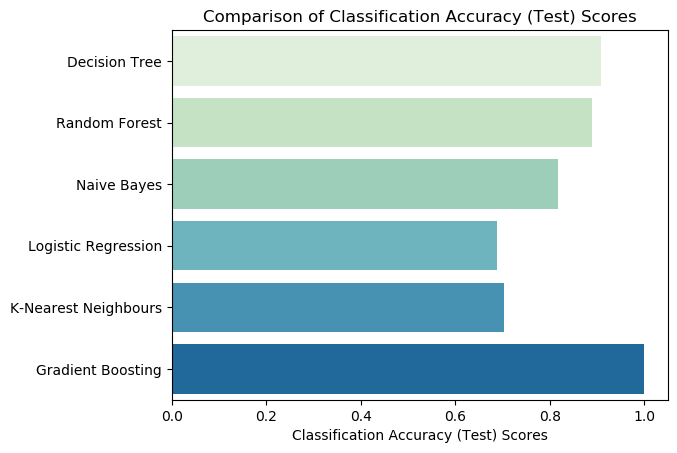

In [208]:
fig, ax = plt.subplots()

r2_test_scores = (r2_test_dectree,r2_test_rforest,r2_test_gnb,r2_test_logreg,r2_test_knn,r2_test_gb)
sb.barplot(data=summarydf,x=r2_test_scores, 
           y=['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression','K-Nearest Neighbours', 
              'Gradient Boosting'], palette=("GnBu"))
plt.title("Comparison of Classification Accuracy (Test) Scores")
plt.xlabel("Classification Accuracy (Test) Scores")

For the classification accuracy, it is a suitable evaluative factor as the ratio of our data classes is roughly 1:3.

## Predictive Models Conclusion: Random Forest

Although Decision Tree has the lowest Mean Squared Error (`MSE`) and the highest Area Under Curve (`AUC`) scores,  we chose to use Random Forest, with the second lowest MSE and second highest AUC scores, for our prediction model. Classification accuracies for both models are comparable. We chose Random Forest as it logically is a better model, since it is an ensemble of decision trees and will thus yield more accurate results. 

Here are some reasons why `decision tree` may not be appropriate for this model:
- Large Number of ‘word’ features
- Some of these ‘word’ features are high up in the tree model
- Some data may not contain any of the 4000 top ‘word’ features
- This narrow branch of classification hence results in a large number of data having identical classification probabilities
- Decision trees may be less accurate than Random Forest since Random Forests prevents overfitting by creating trees on random subsets


# 6. Overview of Predictions
## Based on given data
Checking whether our predictive model chosen above: `Random Forest` is accurate based on the sample data as shown below. 

(Back to [top](#Data-Science-Mini-Project) | Next Section: [Conclusion & Further Application](#7.-Conclusion))

In [224]:
vidData_pred = vidData[0:15]
vidData_pred

,index,video_id,rowid,last_trending_date,publish_date,publish_hour,category_id,category name,channel_title,views,...,title_length,title_wordcount,CAPS,symbols,publishDay,publishMonth,kmeans_cluster,dbscan_cluster,agg_cluster,cluster
0,0,2kyS6SvSYSE,1,20/11/17,13/11/17,17,22,People & Blogs,CaseyNeistat,2564903,...,34,7,28,0,0,11,2,0,2,3
1,1,1ZAPwfrtAFY,2,20/11/17,13/11/17,7,24,Entertainment,LastWeekTonight,6109402,...,62,10,11,3,0,11,2,0,2,3
2,2,5qpjK5DgCt4,3,20/11/17,12/11/17,19,23,Comedy,Rudy Mancuso,5315471,...,53,10,8,3,0,12,2,0,2,5
3,3,puqaWrEC7tY,4,20/11/17,13/11/17,11,24,Entertainment,Good Mythical Morning,913268,...,32,5,4,2,0,11,2,0,0,3
4,4,d380meD0W0M,5,19/11/17,12/11/17,18,24,Entertainment,nigahiga,2819118,...,24,5,12,3,0,12,2,0,2,3
5,5,gHZ1Qz0KiKM,6,20/11/17,13/11/17,19,28,Science & Tech,iJustine,1038365,...,21,5,3,0,0,11,2,0,2,1
6,6,39idVpFF7NQ,7,18/11/17,12/11/17,5,24,Entertainment,Saturday Night Live,2688797,...,41,9,9,2,0,12,0,0,1,3
7,7,nc99ccSXST0,8,19/11/17,12/11/17,21,28,Science & Tech,CrazyRussianHacker,1251577,...,35,8,4,0,0,12,2,0,2,1
8,8,jr9QtXwC9vc,9,15/11/17,13/11/17,14,1,Film & Animation,20th Century Fox,2671756,...,65,12,11,4,0,11,2,0,2,5
9,9,TUmyygCMMGA,10,15/11/17,13/11/17,13,25,News & Politics,Vox,635985,...,55,12,2,0,0,11,2,0,2,4


In [225]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(features_manual[0:15])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [226]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredAbove"], index = vidData_pred.index)
vidData_acc = pd.concat([vidData_pred[["rowid","Above100KViews"]], y_pred], axis = 1)

vidData_acc

,rowid,Above100KViews,PredAbove
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
5,6,1,1
6,7,1,1
7,8,1,1
8,9,1,1
9,10,1,1


### Prediction of Class Probabilities

Checking the Class Probabilities along with the final Class Predictions.

In [229]:
# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
y_prob_frame = pd.DataFrame(y_prob, columns = ['Below100k','Above100k'])
y_prob_frame

,Below100k,Above100k
0,0.083106,0.916894
1,0.096642,0.903358
2,0.069109,0.930891
3,0.065353,0.934647
4,0.070764,0.929236
5,0.074993,0.925007
6,0.106986,0.893014
7,0.076911,0.923089
8,0.107647,0.892353
9,0.087892,0.912108


### Observations

The table above generates the respective probabilities by using the `Random Forest` above, whether the selected video will surpass 100,000 views or not. For each row, values in both columns add up to 1. The higher the probability of the video garnering >100,000 views, the better the prediction whether it will cross 100,000 views respectively.

The prediction of the data using Random Forest is mostly accurate with the exception of `line 10`. Whilst our model has classified video 10 wrongly, based on classification probabilities, video 10 has a 48% to 52% probability ratio with a small margin of error for misclassification. Furthermore, the actual video has ~83,000 views, which we believe is quite close to our threshold value of 100,000 views. Thus, there may be other factors that affect the probability of the video being misclassified.

## Application of prediction model
### Predicting example user input data
This model can be applied in fields such as a marketing advertisement to gain viewership for a companies product. After creating a video advertisement, the company can use the model to predict if its video will gain over 100k views with its current features.

Here are some examples.

(Back to [Overview of Predictions](#6.-Overview-of-Predictions))

### Example 1:

In [230]:
#creating a custom predict function
def predict(TestTitle):
    TestTitle = TestTitle.split()
    featurestest1 = horizontal_stack.columns.tolist()
    featurestest = horizontal_stack.iloc[0:1]
    
    for col in featurestest.columns:
        featurestest[col].values[:]= 0
    for word in TestTitle:
        if (word in featurestest1):
            featurestest.loc[0,word]=1

    return featurestest

Here, we will be predicting a video called "funny video advertisement" with the following description.

In [231]:
featurestest = predict ( "funny video advertisement")
featurestest.loc[0,'TotalLikesDislikes']= 1000
featurestest.loc[0,'TrendDayCount']= 2
featurestest.loc[0,'TrendPublishDiff'] = 1
featurestest.loc[0,'SubscriberCount'] = 10
featurestest.loc[0,'CommentCount'] = 0
featurestest.loc[0,'TagsCount'] = 2
featurestest.loc[0,'TitleWordCount'] = 1
featurestest.loc[0,'Caps'] = 1
featurestest.loc[0,'Symbols']= 1
featurestest.loc[0,'cluster'] = 1

featurestest

/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,TotalLikesDislikes,TrendDayCount,TrendPublishDiff,SubscriberCount,CommentCount,TagsCount,TitleWordCount,Caps,Symbols,cluster
0,0,0,0,0,0,0,0,0,0,0,...,1000.0,2.0,1.0,10.0,0.0,2.0,1.0,1.0,1.0,1.0


In [232]:
y_pred = rforest.predict(featurestest)
y_pred

array([0])

In [233]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(featurestest)

# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
y_prob_frame = pd.DataFrame(y_prob, columns = ['Below100k','Above100k'])
y_prob_frame

,Below100k,Above100k
0,0.614278,0.385722


#### Observations

Based on our `Random Forest` model, it is predicted that our video will not surpass 100,000 views. However, changes can be made to improve the likelihood of our video surpassing 100,000 views.

### Example 2:
Here, we changed the comment count of the same video in Example 1 from `0` to `500`. 

In [234]:
featurestest = predict ( "funny video advertisment")
featurestest.loc[0,'TotalLikesDislikes']= 1000
featurestest.loc[0,'TrendDayCount']= 2
featurestest.loc[0,'TrendPublishDiff'] = 1
featurestest.loc[0,'SubscriberCount'] = 10
featurestest.loc[0,'CommentCount'] = 500
featurestest.loc[0,'TagsCount'] = 2
featurestest.loc[0,'TitleWordCount'] = 1
featurestest.loc[0,'Caps'] = 1
featurestest.loc[0,'Symbols']= 1
featurestest.loc[0,'cluster'] = 1

featurestest

/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/josephinehemingway/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,makeovers,liters,heineken,nesbitt,paleo,sabrina,quinta,banner,compatibility,dyslexia,...,TotalLikesDislikes,TrendDayCount,TrendPublishDiff,SubscriberCount,CommentCount,TagsCount,TitleWordCount,Caps,Symbols,cluster
0,0,0,0,0,0,0,0,0,0,0,...,1000.0,2.0,1.0,10.0,500.0,2.0,1.0,1.0,1.0,1.0


In [235]:
y_pred = rforest.predict(featurestest)
y_pred

array([1])

In [236]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(featurestest)

# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
y_prob_frame = pd.DataFrame(y_prob, columns = ['Below100k','Above100k'])
y_prob_frame

,Below100k,Above100k
0,0.402659,0.597341


#### Observations
Based on our model, we can see the difference in the probabilities of the video being predicted to garner >100,000 views based on the change in the `comment count`. Thus, we can conclude that a video that does not disable comments is more likely to surpass 100,000 views.

# 7. Conclusion

Our team definitely learnt a lot from this project. In this project, we have analysed a set of YouTube video data and created a custom model to predict whether a certain video will surpass 100,000 views. We have engineered specific features and clustered these videos to further improve the predictive accuracy of our model. Though many other factors like the content of the videos we analysed may play a part in contributing to the number of views, we only made do with the data we have, where not many are useful, and created the model. Definitely, there is a lot of room for improvement.

From this project, we have learnt specific traits and behaviour of the data, like how viewer interaction is vital in contributing to the number of views a video garners. Therefore, the accuracy of our model can be further improved with a greater variety of relevant data that would more likely affect view count. These data would then be used as features. Such features would include: "Whether the youtube channel responds to comments" and "Length of Video". 

We thought that given more time and the necessary repositories, we could also possibly:
- run an image processing algorithm to determine the extent to which the thumbnail of a video would affect its views
- determine if the video would cross over 100,000 views within a certain period of time, if given a continuous dataset over a time period that takes periodic data of the videos
- run a video processing algorithm to determine the content of the video


## Further Application 
The application of our model is not limited to YouTube videos. Our model can even be applied to Instagram and Facebook advertisements given the appropriate train data. As most companies are able to track the turnover rate of people who click the links in their videos and advertisements and actually purchase their products, our problem question can then be further expanded to predict sales of a product generated from publication of the video. Such a problem and solution would particularly be useful for businesses who aim to maximise revenue and minimise costs.

(Back to [top](#Data-Science-Mini-Project))

# 8. References
(Back to [top](#Data-Science-Mini-Project))

Dataset from: https://www.kaggle.com/sgonkaggle/youtube-trend-with-subscriber

1. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

2. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality

3. https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python?source=post_page-----5ed17421a59d----------------------&utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=aud-299261629574:dsa-473406573835&utm_loc_interest_ms=&utm_loc_physical_ms=9062548&gclid=CjwKCAjw1cX0BRBmEiwAy9tKHt7Z2eniSy8ocNAEOM26o5oLCkcTtkwBPzaYg-6J-IgHWwrNWJUYQRoCzKcQAvD_BwE

4. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

5. https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

6. https://stackoverflow.com/questions/34047540/python-clustering-purity-metric/51672699#51672699

7. https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation

8. https://www.kaggle.com/beagle01/prediction-with-gradient-boosting-classifier

9. https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7

10. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

11. https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

12. https://towardsdatascience.com/predictive-modeling-picking-the-best-model-69ad407e1ee7

13. https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

14. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

15. https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering

16. https://github.com/joeyajames/Python/blob/master/NLTK/NLTK.ipynb
